# Avance 1 · Análisis y Limpieza de Datos  
### Proyecto SoftCrédito – Probabilidad de Incumplimiento  

> **Equipo #27**  
> Fecha de entrega: Domingo, 23:59 h · Valor: 5 puntos

---

Este cuaderno presenta el **primer avance del proyecto "SoftCrédito – Probabilidad de Incumplimiento"**, cuyo objetivo general es desarrollar un modelo robusto que permita predecir el incumplimiento crediticio utilizando técnicas avanzadas de aprendizaje automático.

Para realizar este análisis, el equipo estableció una conexión directa a una base de datos MySQL alojada en un contenedor Docker local, en sustitución del método inicial basado en SQLite. Esta estrategia permitió una gestión más eficiente y escalable del volumen de datos proveniente del archivo SQL empaquetado en formato `.tar.gz`.

Las etapas cubiertas en este avance incluyen:

1. **Configuración del entorno y conexión a la base MySQL**:  
   La base de datos fue restaurada y alojada en un contenedor Docker para facilitar un acceso ágil, consistente y reproducible, aprovechando la flexibilidad que ofrece Docker para la creación y administración de ambientes locales controlados.

2. **Carga e integración de datos clave**:  
   Se realizó la extracción eficiente de las tablas relevantes (`solicitudes`, `clientes`, `amortizaciones`, `operaciones`, y `parcialidades_amortizaciones`) mediante consultas SQL directas a la base alojada en Docker, asegurando consistencia en la información utilizada.

3. **Procesamiento avanzado y generación de características agregadas**:  
   Los datos fueron integrados mediante operaciones de `join` para formar un dataset consolidado y enriquecido, listo para análisis exploratorio y modelado posterior.

4. **Limpieza exhaustiva y preparación de los datos**:  
   Se identificaron y resolvieron problemas relacionados con valores nulos, valores atípicos y columnas irrelevantes mediante técnicas estadísticas rigurosas y _feature engineering_ específico.

5. **Análisis exploratorio profundo (EDA)**:  
   Se aplicaron técnicas de visualización y análisis estadístico univariante, bivariante y multivariante para descubrir relaciones clave, patrones ocultos y tendencias importantes que afectan la probabilidad de incumplimiento.

6. **Conclusiones preliminares y próximos pasos**:  
   Finalmente, se sintetizaron hallazgos significativos que orientarán el desarrollo posterior del modelo predictivo, en línea con la metodología CRISP-ML(Q).

A continuación, se detalla cada una de estas etapas, enfatizando los resultados más relevantes y las decisiones estratégicas del equipo en este primer avance.
 etapa del proceso.



## 1 · Conexión a MySQL

In [1]:
# EJECUTA SOLO UNA VEZ
#+%pip install --quiet pymysql sqlalchemy



In [2]:
import pandas as pd
from sqlalchemy import create_engine

HOST, PORT   = "127.0.0.1", 3306
USER, PASSWD = "analyst", "analystpass"
DB           = "BASE1"

engine = create_engine(f"mysql+pymysql://{USER}:{PASSWD}@{HOST}:{PORT}/{DB}")

# Prueba rápida
tablas = pd.read_sql("SHOW TABLES;", engine)
print("Conexión OK. Tablas encontradas:")
display(tablas)


Conexión OK. Tablas encontradas:


,Tables_in_BASE1
0,abonosstp
1,accesos_directos
2,accionistas_clientes
3,accionmeta
4,acreedores
...,...
737,xml_buro_pf
738,xml_buro_pm
739,xmlcirculopf
740,xmls_emitidos


## 2. Extracción de Tablas Clave a DataFrames


In [3]:
# Cargar las tablas SQL en DataFrames de pandas
df_solicitudes = pd.read_sql("SELECT * FROM solicitudes", con=engine)
df_clientes = pd.read_sql("SELECT * FROM clientes", con=engine)
df_operaciones = pd.read_sql("SELECT * FROM operaciones", con=engine)
df_amortizaciones = pd.read_sql("SELECT * FROM amortizaciones", con=engine)
df_parcialidades = pd.read_sql("SELECT * FROM parcialidades_amortizaciones", con=engine)

# Mostrar el número de registros y columnas de cada tabla cargada
print(f"solicitudes: {df_solicitudes.shape[0]} filas, {df_solicitudes.shape[1]} columnas")
print(f"clientes: {df_clientes.shape[0]} filas, {df_clientes.shape[1]} columnas")
print(f"operaciones: {df_operaciones.shape[0]} filas, {df_operaciones.shape[1]} columnas")
print(f"amortizaciones: {df_amortizaciones.shape[0]} filas, {df_amortizaciones.shape[1]} columnas")
print(f"parcialidades_amortizaciones: {df_parcialidades.shape[0]} filas, {df_parcialidades.shape[1]} columnas")

# Vista previa de las primeras filas de cada DataFrame
print("\n--- Muestras de datos (primeras 5 filas) ---")
print("Solicitudes:")
display(df_solicitudes.head())
print("\nClientes:")
display(df_clientes.head())
print("\nOperaciones:")
display(df_operaciones.head())
print("\nAmortizaciones:")
display(df_amortizaciones.head())
print("\nParcialidades amortizaciones:")
display(df_parcialidades.head())


solicitudes: 65092 filas, 306 columnas
clientes: 39981 filas, 148 columnas
operaciones: 40967 filas, 30 columnas
amortizaciones: 70332 filas, 80 columnas
parcialidades_amortizaciones: 42301 filas, 25 columnas

--- Muestras de datos (primeras 5 filas) ---
Solicitudes:


,id,clave,contrato,ciclo,lugar_aceptacion,id_usuario,usuario,nombre_usuario,fecha_solicitud,fecha_aceptacion,...,monto_devuelto_garantia,motivo_rechazo_garantia,monto_garantizado_solicitado,monto_garantizado_autorizado,monto_garantizado_reclamado,monto_garantizado_pagado,monto_garantizado_devuelto,decimales,ajuste_decimales,anticipoBase
0,1990,SOL--HQ---11/2023-0001,None,01,None,2754,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,None,None,None,None,None,2,0,None
1,1991,SOL--HQ---11/2023-0002,None,01,None,2362,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,None,None,None,None,None,2,0,None
2,1992,SOL--HQ---11/2023-0003,None,01,None,2756,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,None,None,None,None,None,2,0,None
3,4193,SOL--HQ---11/2023-0004,None,01,None,765,super,Super del Sistema,2023-11-07 00:00:00,None,...,None,None,None,None,None,None,None,2,0,None
4,4569,SOL--HQ---11/2023-0005,None,01,None,2756,super,Super del Sistema,2023-11-07 00:00:00,None,...,None,None,None,None,None,None,None,2,0,None



Clientes:


,id,id_ejecutivo,id_tipo_cliente,puesto_grupo,clave,clave_cliente,nombre_completo,nombre,nombre2,apellido_paterno,...,fecha_estabilidad_laboral,fecha_constitucion,cruzamientos,cruzamientos_fiscal,origen,fax,id_grupo_general,id_subgrupo,id_segmentacion_cub,sector_cub
0,2,2,NaN,None,PRO-10-2023-0002,PRO-10-2023-0002,Jonh Doe103,Smith102,Todd102,Doe101,...,None,None,,,None,None,None,None,None,None
1,4,2,1.0,None,2653,2653,Jonh Doe106,Smith105,Todd105,Doe104,...,None,None,,,None,None,None,None,None,None
2,5,2,1.0,None,2652,2652,Jonh Doe109,Smith108,Todd108,Doe107,...,None,None,,,None,None,None,None,None,None
3,6,2,1.0,None,2651,2651,Jonh Doe112,Smith111,Todd111,Doe110,...,None,None,,,None,None,None,None,None,None
4,7,2,1.0,None,2650,2650,Jonh Doe115,Smith114,Todd114,Doe113,...,None,None,,,None,None,None,None,None,None



Operaciones:


,id,id_tipo_operacion,id_instrumento_monetario,id_solicitud,id_solicitud_factoraje,id_disposicion,id_cliente,monto,monto_mxn,monto_usd,...,referencia_operacion,folio,id_garantia_solicitud,monto_garantia_solicitud,id_banco,id_tabla_pivote_stp,adeudo_total,intereses_devengados,saldo_inicial,descuento_pago_puntual
0,3911,9,1,10763,None,None,NaN,2200.0,2200.0,123.9282,...,None,NaN,None,NaN,None,0,0.0,0.0,0.0,0.0
1,3912,9,1,10771,None,None,NaN,1400.0,1400.0,78.8634,...,None,NaN,None,NaN,None,0,0.0,0.0,0.0,0.0
2,3913,9,1,10774,None,None,NaN,1700.0,1700.0,95.7627,...,None,NaN,None,NaN,None,0,0.0,0.0,0.0,0.0
3,3914,9,1,10782,None,None,NaN,3000.0,3000.0,168.9930,...,None,NaN,None,NaN,None,0,0.0,0.0,0.0,0.0
4,3915,9,1,10783,None,None,NaN,2700.0,2700.0,152.0937,...,None,NaN,None,NaN,None,0,0.0,0.0,0.0,0.0



Amortizaciones:


,id,id_solicitud,id_disposicion,id_grupo_solidario,numero_amortizacion,fecha_amortizacion,fecha_devengado,fecha_pago,saldo_capital,saldo_inicial,...,fechacobro,enviado_fimubac,id_disposicion_revolvente,cantidad,capital_renta,interes_renta,factor_descuento,saldo_renta,iva_capital_renta,iva_interes_renta
0,3960,10763,None,None,0,2023-09-20,NaT,2023-09-20 00:00:00,2200.00,2200.00,...,None,0,None,None,0.0,0.0,0.0,0.0,0.0,0.0
1,3961,10763,None,None,1,2023-09-27,NaT,None,2200.00,2200.00,...,None,0,None,None,0.0,0.0,0.0,NaN,0.0,0.0
2,3962,10763,None,None,2,2023-10-04,NaT,None,2005.83,2005.83,...,None,0,None,None,0.0,0.0,0.0,NaN,0.0,0.0
3,3963,10763,None,None,3,2023-10-11,NaT,None,1792.74,1792.74,...,None,0,None,None,0.0,0.0,0.0,NaN,0.0,0.0
4,3964,10763,None,None,4,2023-10-18,NaT,None,1558.88,1558.88,...,None,0,None,None,0.0,0.0,0.0,NaN,0.0,0.0



Parcialidades amortizaciones:


,id,id_amortizacion,fecha_pago,pago_capital,pago_interes,pago_moratorios,pago_comisiones,pago_comisiones_iniciales,pago_gastos_iniciales,pago_garantia_extendida,...,pago_total,saldo_inicial,saldo_final,pago_con_garantia,status,referencia_operacion,iva_interes,anticipo_capital,fechacobro,id_comision_descontada
0,4765,3990,2023-10-03 00:00:00,0.00000,0.21606,0.0,0.0,0.0,0.0,0.0,...,0.21606,2682.84101,2682.62495,0.21606,Registrado,u1s10782c2632t1700615573788,None,None,None,None
1,4766,3990,2023-10-10 00:00:00,318.86823,237.55033,0.0,0.0,0.0,0.0,0.0,...,556.41855,2681.96800,2125.54944,556.41855,Registrado,u1s10782c2632t1700615574353,None,None,None,None
2,4767,3991,2023-10-10 00:00:00,0.00000,0.68145,0.0,0.0,0.0,0.0,0.0,...,0.68145,2332.66298,2331.98154,0.68145,Registrado,u1s10782c2632t1700615574353,None,None,None,None
3,4768,3991,2023-10-17 00:00:00,349.86998,206.25962,0.0,0.0,0.0,0.0,0.0,...,556.12960,2331.39139,1775.26179,556.12960,Registrado,u1s10782c2632t1700615574897,None,None,None,None
4,4769,3992,2023-10-17 00:00:00,0.00000,0.97040,0.0,0.0,0.0,0.0,0.0,...,0.97040,1948.24330,1947.27290,0.97040,Registrado,u1s10782c2632t1700615574897,None,None,None,None


In [4]:
def show_cols(df, nombre, limite=600):
    """Imprime hasta 'limite' nombres de columnas de un dataframe."""
    cols = df.columns.tolist()[:limite]
    print(f"Cols {nombre} ({len(df.columns)} totales, mostrando {len(cols)}):")
    print(cols, "\n")

def inspeccionar_y_normalizar():
    # 1) Mostrar columnas (límite 600) ............................
    show_cols(df_clientes,        "clientes")
    show_cols(df_solicitudes,     "solicitudes")
    show_cols(df_operaciones,     "operaciones")
    show_cols(df_amortizaciones,  "amortizaciones")
    show_cols(df_parcialidades,   "parcialidades_amortizaciones")


## 3. Unión y Consolidación de la Información


In [5]:
def renombrar_ids():
    # --- CLIENTES -------------------------------------------------------------
    if "id_cliente" not in df_clientes.columns and "id" in df_clientes.columns:
        df_clientes.rename(columns={"id": "id_cliente"}, inplace=True)

    # --- SOLICITUDES ----------------------------------------------------------
    if "id_solicitud" not in df_solicitudes.columns and "id" in df_solicitudes.columns:
        df_solicitudes.rename(columns={"id": "id_solicitud"}, inplace=True)

    # --- OPERACIONES ----------------------------------------------------------
    if "id_operacion" not in df_operaciones.columns and "id" in df_operaciones.columns:
        df_operaciones.rename(columns={"id": "id_operacion"}, inplace=True)

    # --- AMORTIZACIONES -------------------------------------------------------
    #   · Caso 1: viene con 'id'  ➜ renombrar a id_amortizacion
    #   · Caso 2: no trae id ni id_amortizacion, pero SÍ trae id_operacion
    if "id_amortizacion" not in df_amortizaciones.columns:
        if "id" in df_amortizaciones.columns:
            df_amortizaciones.rename(columns={"id": "id_amortizacion"}, inplace=True)
        elif "id_operacion" in df_amortizaciones.columns:
            # clonamos la llave para poder hacer los merges
            df_amortizaciones["id_amortizacion"] = df_amortizaciones["id_operacion"]

    # --- PARCIALIDADES --------------------------------------------------------
    if "id_amortizacion" not in df_parcialidades.columns and "id" in df_parcialidades.columns:
        df_parcialidades.rename(columns={"id": "id_amortizacion"}, inplace=True)

    # --- Validaciones ---------------------------------------------------------
    assert "id_cliente"       in df_clientes.columns,       "falta id_cliente"
    assert "id_solicitud"     in df_solicitudes.columns,    "falta id_solicitud"
    assert "id_amortizacion"  in df_amortizaciones.columns, "falta id_amortizacion en amortizaciones"
    assert "id_amortizacion"  in df_parcialidades.columns,  "falta id_amortizacion en parcialidades"

# llamar una vez
renombrar_ids()



In [6]:
################################################################################
# 1 · Segmento_persona
################################################################################
ESTADOS_APROBADOS = ["Aceptada", "Reestructurado"]

aprobadas     = df_solicitudes.loc[
    df_solicitudes["status_asignado"].isin(ESTADOS_APROBADOS), "id_cliente"
].unique()
con_solicitud = df_solicitudes["id_cliente"].unique()

def segmentar(row):
    if row["es_cliente"] == 0:
        return "Prospecto"
    if row["id_cliente"] in aprobadas:
        return "Cliente"
    if row["id_cliente"] in con_solicitud:
        return "Solicitante"
    return "Prospecto"

df_clientes["segmento_persona"] = df_clientes.apply(segmentar, axis=1)

################################################################################
# 2 · df_creditos  (solicitud + cliente + operación)
################################################################################
df_creditos = (
    df_solicitudes
      .merge(df_clientes,    on="id_cliente",   how="left", suffixes=("", "_cli"))
      .merge(df_operaciones, on="id_solicitud", how="left", suffixes=("", "_ope"))
)

################################################################################
# 3 · Pagos agregados  (parcialidades → amortizaciones)
################################################################################
FECHA_CORTE = pd.Timestamp("2024-12-05")

df_parcialidades["fecha_pago"] = pd.to_datetime(df_parcialidades["fecha_pago"],
                                                errors="coerce")
df_parcialidades["pago_total"] = pd.to_numeric(df_parcialidades["pago_total"],
                                               errors="coerce").fillna(0)

pagos_por_amort = (
    df_parcialidades
      .groupby("id_amortizacion", as_index=False)
      .agg(monto_pagado_total=("pago_total", "sum"),
           fecha_ultimo_pago  =("fecha_pago",  "max"))
)

# ── eliminar columnas duplicadas antes de unir ───────────────────────────
for col in ["monto_pagado_total", "fecha_ultimo_pago"]:
    if col in df_amortizaciones.columns:
        df_amortizaciones.drop(columns=col, inplace=True)

df_amortizaciones = df_amortizaciones.merge(
    pagos_por_amort, on="id_amortizacion", how="left", suffixes=("", "_agg")
)
df_amortizaciones["monto_pagado_total"].fillna(0, inplace=True)

################################################################################
# 4 · Días de atraso (corte 05-dic-2024)
################################################################################
df_amortizaciones["fecha_amortizacion"] = pd.to_datetime(
    df_amortizaciones["fecha_amortizacion"], errors="coerce"
)
df_amortizaciones["fecha_ultimo_pago"] = pd.to_datetime(
    df_amortizaciones["fecha_ultimo_pago"], errors="coerce"
)

saldo_pend = (
    df_amortizaciones["pago_restante"]
    if "pago_restante" in df_amortizaciones.columns
    else df_amortizaciones["saldo_capital"] - df_amortizaciones["monto_pagado_total"]
)

df_amortizaciones["dias_atraso"] = 0

# Cuotas vencidas y no pagadas
mask_atrasada = (
    (df_amortizaciones["fecha_amortizacion"] <= FECHA_CORTE) & (saldo_pend > 0)
)
df_amortizaciones.loc[mask_atrasada, "dias_atraso"] = (
    FECHA_CORTE - df_amortizaciones.loc[mask_atrasada, "fecha_amortizacion"]
).dt.days

# Cuotas pagadas con retraso
mask_pagada_tarde = (
    (saldo_pend <= 0) &
    (df_amortizaciones["fecha_ultimo_pago"] > df_amortizaciones["fecha_amortizacion"])
)
df_amortizaciones.loc[mask_pagada_tarde, "dias_atraso"] = (
    df_amortizaciones.loc[mask_pagada_tarde, "fecha_ultimo_pago"] -
    df_amortizaciones.loc[mask_pagada_tarde, "fecha_amortizacion"]
).dt.days

df_amortizaciones["dias_atraso"] = (
    df_amortizaciones["dias_atraso"].clip(lower=0).astype(int)
)

# Mora máxima por crédito
max_mora_credito = (
    df_amortizaciones
      .groupby("id_solicitud", as_index=False)
      .agg(dias_atraso_max=("dias_atraso", "max"))
)
df_creditos = df_creditos.merge(max_mora_credito, on="id_solicitud", how="left")
df_creditos["dias_atraso_max"].fillna(0, inplace=True)

################################################################################
# 5 · df_full  (detalle cuota)
################################################################################
df_full = (
    df_creditos
      .merge(df_amortizaciones, on="id_solicitud", how="left",
             suffixes=("", "_amo"))
)

################################################################################
# 6 · Métricas derivadas a nivel crédito
################################################################################
key_credito = "id_operacion" if "id_operacion" in df_full.columns else "id_solicitud"

agr_cols = {
    "dias_atraso": ["max", "mean", "count"],
    "monto_pagado_total": "sum"
}
agr_cols = {k: v for k, v in agr_cols.items() if k in df_full.columns}

metrics_by_credit = (
    df_full
      .groupby(key_credito)
      .agg(agr_cols)
)
metrics_by_credit.columns = [
    "_".join(map(str, col)) if isinstance(col, tuple) else str(col)
    for col in metrics_by_credit.columns.to_flat_index()
]
metrics_by_credit.reset_index(inplace=True)

if "dias_atraso_max" in metrics_by_credit.columns:
    metrics_by_credit["default_flag"] = (
        metrics_by_credit["dias_atraso_max"] >= 90
    ).astype(int)

df_creditos = df_creditos.merge(metrics_by_credit, on=key_credito, how="left")

C:\Users\Hecto\AppData\Local\Temp\ipykernel_10352\3393841129.py:56: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_amortizaciones["monto_pagado_total"].fillna(0, inplace=True)
C:\Users\Hecto\AppData\Local\Temp\ipykernel_10352\3393841129.py:105: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

## 4. Limpieza de Datos y Feature Engineering


### 4.1 Manejo de valores nulos


In [7]:
# Ver porcentaje de valores nulos por columna en el df_full consolidado
null_percent = df_full.isnull().mean() * 100
null_percent = null_percent[null_percent > 0].sort_values(ascending=False)
print("Porcentaje de valores nulos por columna (solo columnas con nulos):")
print(null_percent)


if 'ingreso_mensual' in df_full.columns:
    median_income = df_full['ingreso_mensual'].median(skipna=True)
    df_full['ingreso_mensual'].fillna(median_income, inplace=True)
if 'puntaje_crediticio' in df_full.columns:
    median_score = df_full['puntaje_crediticio'].median(skipna=True)
    df_full['puntaje_crediticio'].fillna(median_score, inplace=True)

# Imputación de nulos en variables categóricas (ejemplo)
cat_cols = ['genero', 'estado_solicitud', 'estado_operacion']  # columnas categóricas posibles
for col in cat_cols:
    if col in df_full.columns:
        df_full[col].fillna("No especificado", inplace=True)
        
# Verificar nulos restantes
null_counts = df_full.isnull().sum()
print("Valores nulos restantes por columna:")
print(null_counts[null_counts > 0])



Porcentaje de valores nulos por columna (solo columnas con nulos):
folio_pre                 100.000000
reserva_total             100.000000
monto_preautorizado       100.000000
id_pagado_con_deposito    100.000000
id_etapa_credito          100.000000
                             ...    
nombre                      0.005491
nombre_completo             0.005491
clave_cliente_cli           0.005491
es_cliente                  0.005491
segmento_persona            0.005491
Length: 479, dtype: float64
Valores nulos restantes por columna:
contrato               53472
ciclo                   7625
lugar_aceptacion      400630
fecha_aceptacion       56138
fecha_disposicion      56155
                       ...  
iva_capital_renta     167975
iva_interes_renta     167975
monto_pagado_total     56331
fecha_ultimo_pago     261443
dias_atraso_amo        56331
Length: 479, dtype: int64


### 4.2 Cálculo de Días de Atraso en Pagos


In [8]:
# 4.2  · Cálculo de días de atraso (dataset df_full, corte 05-dic-2024) ─────────────────
from datetime import datetime

FECHA_CORTE = pd.Timestamp("2024-12-05")   # corte analítico fijo

# 1) Asegura que las columnas de fecha realmente sean datetime ----------
for col in ["fecha_ultimo_pago", "fecha_vencimiento", "fecha_amortizacion"]:
    if col in df_full.columns:
        df_full[col] = pd.to_datetime(df_full[col], errors="coerce")

# 2) Selecciona la columna de vencimiento que tengas --------------------
#    · si existe fecha_vencimiento úsala; si no, usa fecha_amortizacion
venc_col = "fecha_vencimiento" if "fecha_vencimiento" in df_full.columns else "fecha_amortizacion"

# 3) Inicializa la columna de mora
df_full["dias_atraso"] = 0

# ─────────────── Caso A · cuota pagada (hay fecha_ultimo_pago) ──────────
mask_pagada = df_full["fecha_ultimo_pago"].notna() & df_full[venc_col].notna()

dias_pagada = (
    df_full.loc[mask_pagada, "fecha_ultimo_pago"]
    .sub(df_full.loc[mask_pagada, venc_col])
    .dt.days
    .clip(lower=0)                # si pagó antes o en fecha → 0
)

df_full.loc[mask_pagada, "dias_atraso"] = dias_pagada

# Caso B · cuota NO pagada y ya vencida al 05-dic-2024
if {"monto_pagado_total", "monto_cuota"}.issubset(df_full.columns):
    mask_no_paga = df_full["monto_pagado_total"] < df_full["monto_cuota"]
else:
    mask_no_paga = df_full["monto_pagado_total"].isna()

mask_vencida   = (df_full[venc_col] < FECHA_CORTE) & df_full[venc_col].notna()
mask_atrasada  = mask_no_paga & mask_vencida

dias_no_pagada = (
    (FECHA_CORTE - df_full.loc[mask_atrasada, venc_col])   # ← RESTA CORRECTA
      .dt.days
)

df_full.loc[mask_atrasada, "dias_atraso"] = dias_no_pagada


# 4) Limpieza final
df_full["dias_atraso"] = df_full["dias_atraso"].fillna(0).astype(int)

# 5) Quick check
print("Distribución resumida de dias_atraso:")
print(df_full["dias_atraso"].describe())
display(df_full[[venc_col, "fecha_ultimo_pago", "monto_pagado_total", "dias_atraso"]].head())



Distribución resumida de dias_atraso:
count    400630.000000
mean          5.154247
std         294.727888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       19693.000000
Name: dias_atraso, dtype: float64


,fecha_vencimiento,fecha_ultimo_pago,monto_pagado_total,dias_atraso
0,NaT,NaT,NaN,0
1,NaT,NaT,NaN,0
2,NaT,NaT,NaN,0
3,NaT,NaT,NaN,0
4,NaT,NaT,NaN,0


### 4.3 Clasificación de personas: Cliente vs Solicitante vs Prospecto



In [9]:
# Crear una Series/columna de tipo de persona en df_clientes
clientes_ids_con_credito = set(df_operaciones['id_cliente'].dropna().unique())
clientes_ids_solicitud = set(df_solicitudes['id_cliente'].dropna().unique())

tipo_persona = []
for cid in df_clientes['id_cliente']:
    if cid in clientes_ids_con_credito:
        tipo_persona.append("Cliente")
    elif cid in clientes_ids_solicitud:
        tipo_persona.append("Solicitante")
    else:
        tipo_persona.append("Prospecto")

df_clientes['tipo_persona'] = tipo_persona
df_clientes['tipo_persona'].value_counts()

# Añadir tipo_persona al df_full mediante un mapeo
cliente_tipo_map = dict(zip(df_clientes['id_cliente'], df_clientes['tipo_persona']))
df_full['tipo_persona'] = df_full['id_cliente'].map(cliente_tipo_map)
# Verificar
df_full['tipo_persona'].value_counts()


df_creditos['tipo_persona'] = df_creditos['id_cliente'].map(cliente_tipo_map)


### 4.4 Tratamiento de valores atípicos (outliers)



In [10]:
# ──────────────────────────────────────────────────────────────────────────────
# 4.4  Tratamiento de valores atípicos  +  derivación de edad del cliente
# ──────────────────────────────────────────────────────────────────────────────
import numpy as np
import pandas as pd

# 1) Edad del cliente ----------------------------------------------------------
if "fecha_nacimiento" in df_full.columns:
    # 1-a  Convertir todo a datetime64 (maneja strings, datetime.date, NaN…)
    df_full["fecha_nacimiento"] = pd.to_datetime(
        df_full["fecha_nacimiento"],
        errors="coerce"           # valores raros → NaT
    )

    # 1-b  Calcular edad en años al corte de hoy (puedes fijar otra fecha)
    hoy = pd.Timestamp("today").normalize()       # p.ej. 2025-05-05 00:00:00
    df_full["edad_cliente"] = (
        (hoy - df_full["fecha_nacimiento"]).dt.days // 365
    )

# 2) Descripción rápida de numéricas ------------------------------------------
numeric_cols = [
    "monto_credito", "monto_solicitado", "ingreso_mensual",
    "edad_cliente", "dias_atraso", "puntaje_crediticio"
]

for col in numeric_cols:
    if col in df_full.columns:
        # fuerza a numérico si la columna viene como object
        df_full[col] = pd.to_numeric(df_full[col], errors="coerce")
        print(f"\n▶ {col}")
        print(
            df_full[col].describe(
                percentiles=[0.25, 0.50, 0.75, 0.90, 0.95, 0.99]
            )
        )

# 3) Capping (winsorisation) al P99 para variables clave -----------------------
cols_to_cap = ["monto_credito", "ingreso_mensual", "monto_solicitado"]

for col in cols_to_cap:
    if col in df_full.columns:
        p99 = df_full[col].quantile(0.99)
        df_full[col] = np.where(df_full[col] > p99, p99, df_full[col])

# 4) Edad: limitar a 90 años (casos extremadamente raros) ----------------------
if "edad_cliente" in df_full.columns:
    df_full["edad_cliente"] = np.where(
        df_full["edad_cliente"] > 90, 90, df_full["edad_cliente"]
    )

# 5) Días de atraso: limitar a 365  -------------------------------------------
if "dias_atraso" in df_full.columns:
    df_full["dias_atraso_cap"] = np.where(
        df_full["dias_atraso"] > 365, 365, df_full["dias_atraso"]
    )
else:
    df_full["dias_atraso_cap"] = np.nan        # columna vacía si no existe




▶ monto_solicitado
count    400630.000000
mean       1511.917767
std         625.588199
min           0.000000
25%        1300.000000
50%        1500.000000
75%        1800.000000
90%        2100.000000
95%        2500.000000
99%        2900.000000
max        5000.000000
Name: monto_solicitado, dtype: float64

▶ edad_cliente
count    400608.0
mean         25.0
std           0.0
min          25.0
25%          25.0
50%          25.0
75%          25.0
90%          25.0
95%          25.0
99%          25.0
max          25.0
Name: edad_cliente, dtype: float64

▶ dias_atraso
count    400630.000000
mean          5.154247
std         294.727888
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
90%           0.000000
95%           0.000000
99%          11.000000
max       19693.000000
Name: dias_atraso, dtype: float64


## 5 Generación de variables derivadas adicionales

In [11]:
# ---------------------------------------------
# 0. Parámetros y helpers
# ---------------------------------------------
CORTE = pd.Timestamp("2024-12-05")

def safe(col, df):              # True si la columna existe
    return col in df.columns

# Normalizar ids a nombres estándar (si no lo hiciste antes)
df_clientes   = df_clientes.rename(columns={"id": "id_cliente"}, errors="ignore")
df_solicitudes= df_solicitudes.rename(columns={"id": "id_solicitud"}, errors="ignore")
df_amortizaciones = df_amortizaciones.rename(columns={"id": "id_amortizacion"},
                                             errors="ignore")
df_operaciones = df_operaciones.rename(columns={"id": "id_operacion"}, errors="ignore")

# ---------------------------------------------
# 1.  Cliente-level
# ---------------------------------------------
if safe("fecha_nacimiento", df_clientes):
    df_clientes["edad_cliente"] = (
        (CORTE - pd.to_datetime(df_clientes["fecha_nacimiento"], errors="coerce"))
        .dt.days // 365
    )

if safe("fecha_alta", df_clientes):
    df_clientes["antiguedad_cliente"] = (
        (CORTE - pd.to_datetime(df_clientes["fecha_alta"], errors="coerce"))
        .dt.days // 365
    )

# Segmento_persona (ya implementado pero lo incluyo por claridad)
# …   tu función segmentar() …

# ---------------------------------------------
# 2.   Solicitud-level
# ---------------------------------------------
df_solicitudes["plazo_anios"] = (
    df_solicitudes.get("plazo_autorizado", np.nan) / 12
)

if safe("monto_autorizado", df_solicitudes) and safe("ingreso_cliente", df_solicitudes):
    df_solicitudes["ratio_monto_ingreso"] = (
        df_solicitudes["monto_autorizado"]
        / df_solicitudes["ingreso_cliente"].replace(0, np.nan)
    )

df_solicitudes["dias_desde_aceptacion"] = (
    CORTE - pd.to_datetime(df_solicitudes["fecha_aceptacion"], errors="coerce")
).dt.days

df_solicitudes["producto_leasing_flag"] = (
    df_solicitudes["nombre_producto"]
      .fillna("")
      .str.contains("arrend", case=False, regex=True)
      .astype(int)
)

# ---------------------------------------------
# 3.  Cuota (amortización) – pagos y mora
# ---------------------------------------------
# (usa tu cálculo anterior de dias_atraso y monto_pagado_total)

df_amortizaciones["flag_cuota_vencida"] = (df_amortizaciones["dias_atraso"] > 0).astype(int)
df_amortizaciones["porcentaje_pagado"] = (
    df_amortizaciones["monto_pagado_total"] / df_amortizaciones["pago_total"].replace(0, np.nan)
)

# ---------------------------------------------
# 4.   Crédito agregado  (id_operacion si existe, si no id_solicitud)
# ---------------------------------------------
key_credito = "id_operacion" if safe("id_operacion", df_amortizaciones) else "id_solicitud"

aggr = (
    df_amortizaciones
      .groupby(key_credito, as_index=False)
      .agg(max_dias_atraso   = ("dias_atraso", "max"),
           promedio_dias_atraso = ("dias_atraso", "mean"),
           total_pagado_credito = ("monto_pagado_total", "sum"))
)

aggr["default_flag"] = (aggr["max_dias_atraso"] >= 90).astype(int)

# ---------------------------------------------
# 5.   Unión final
# ---------------------------------------------
df_creditos = (
    df_solicitudes
      .merge(df_clientes,   on="id_cliente", how="left", suffixes=("", "_cli"))
      .merge(aggr,          on=key_credito,  how="left")      # métricas de mora
)

# Recuperación %
df_creditos["recuperacion_pct"] = (
    df_creditos["total_pagado_credito"]
    / df_creditos["monto_autorizado"].replace(0, np.nan)
)

print("🔹 df_creditos shape:", df_creditos.shape)
display(df_creditos.head(3))

# ----------------------------------------------------------
# 6.   Selección automática de columnas para modelar riesgo
# ----------------------------------------------------------
target         = "default_flag"
basic_numeric  = ["monto_autorizado", "plazo_anios", "tasa_moratoria", "ratio_monto_ingreso",
                  "ingreso_mensual", "num_creditos_cliente", "max_dias_atraso",
                  "promedio_dias_atraso", "recuperacion_pct"]
basic_categorical = ["tipo_persona", "genero", "producto_leasing_flag", "segmento_persona"]

# Filtra dinámico
num_cols = [c for c in basic_numeric if safe(c, df_creditos)]
cat_cols = [c for c in basic_categorical if safe(c, df_creditos)]

X = df_creditos[num_cols + cat_cols].copy()
y = df_creditos[target]

# One-hot seguro
X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True, dummy_na=True)

print("✅  Matriz final para ML:", X_encoded.shape)



🔹 df_creditos shape: (65092, 465)


,id_solicitud,clave,contrato,ciclo,lugar_aceptacion,id_usuario,usuario,nombre_usuario,fecha_solicitud,fecha_aceptacion,...,id_segmentacion_cub,sector_cub,segmento_persona,edad_cliente,antiguedad_cliente,max_dias_atraso,promedio_dias_atraso,total_pagado_credito,default_flag,recuperacion_pct
0,1990,SOL--HQ---11/2023-0001,None,01,None,2754,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,Solicitante,24.0,1.0,NaN,NaN,NaN,NaN,NaN
1,1991,SOL--HQ---11/2023-0002,None,01,None,2362,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,Solicitante,24.0,1.0,NaN,NaN,NaN,NaN,NaN
2,1992,SOL--HQ---11/2023-0003,None,01,None,2756,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,Solicitante,24.0,1.0,NaN,NaN,NaN,NaN,NaN


✅  Matriz final para ML: (65092, 12)


## 6. Análisis Exploratorio de Datos (EDA)

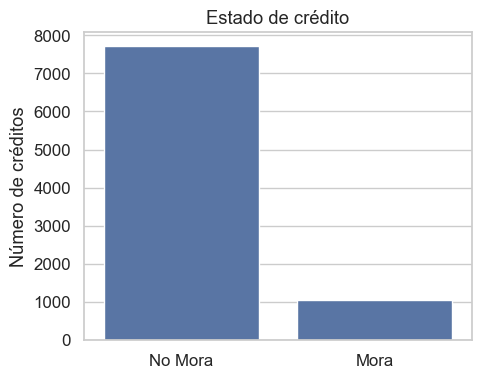

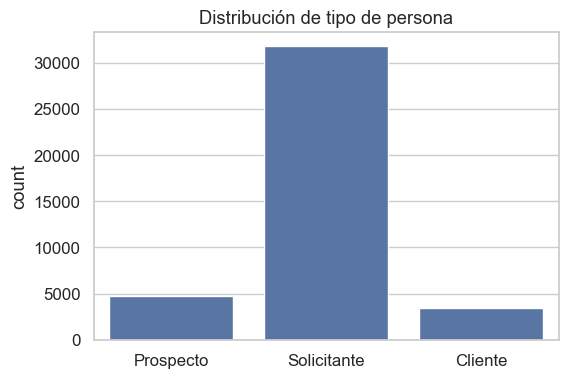

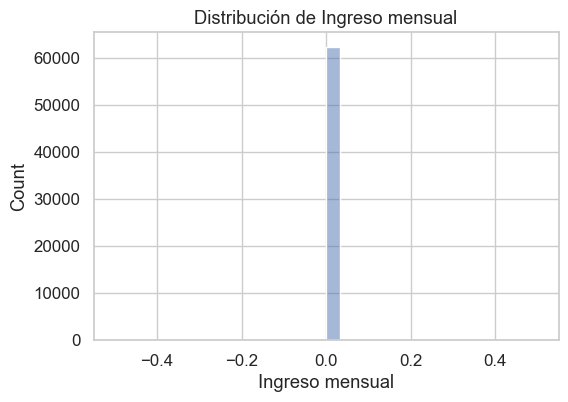

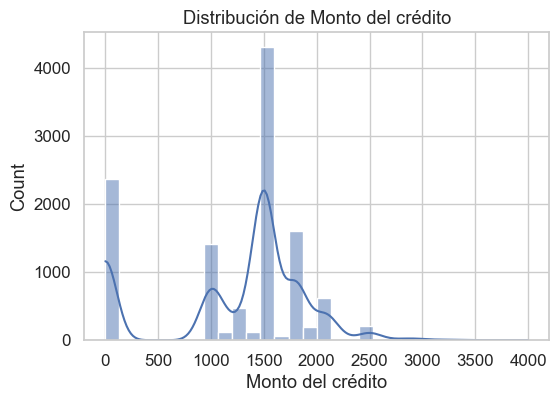

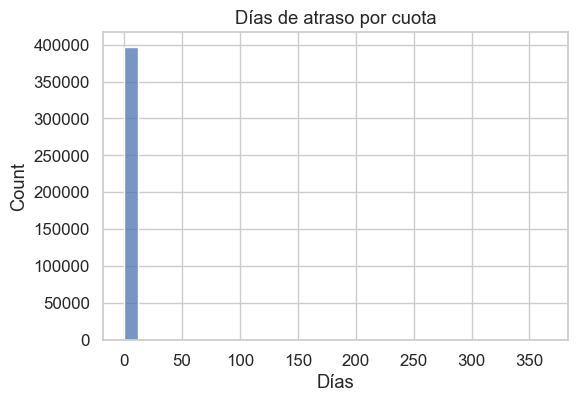

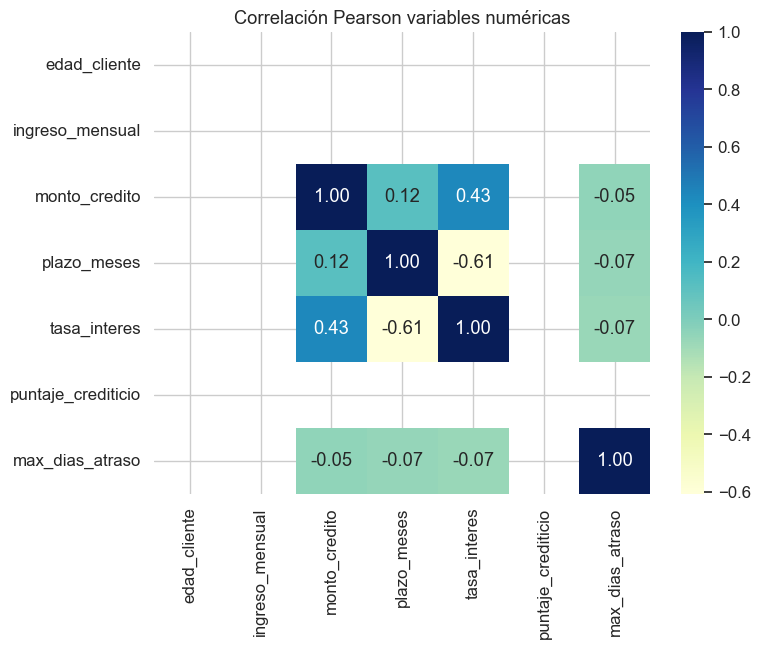

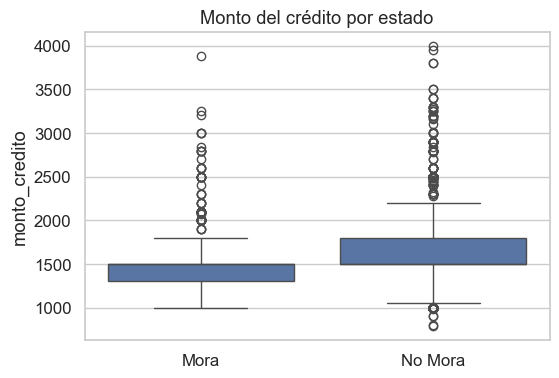

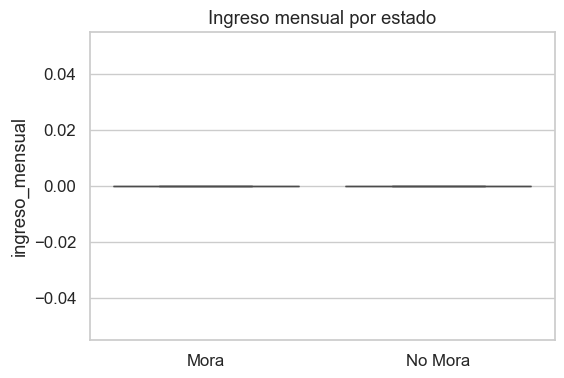

estado_credito            Mora  No Mora
edad_cliente    mean      24.0     24.0
                median    24.0     24.0
                std        0.0      0.0
                count   1054.0   7707.0
ingreso_mensual mean       0.0      0.0
                median     0.0      0.0
                std        0.0      0.0
                count   1007.0   7665.0
monto_credito   mean    1481.5   1558.4
                median  1500.0   1500.0
                std      341.1    368.1
                count   1054.0   7707.0
plazo_meses     mean       6.7      7.1
                median     6.0      6.0
                std        1.4      1.7

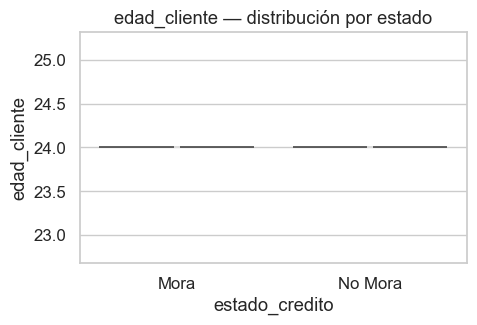

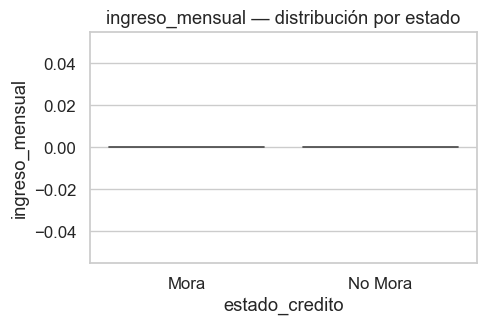

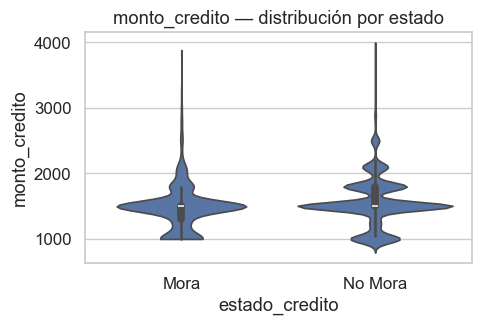

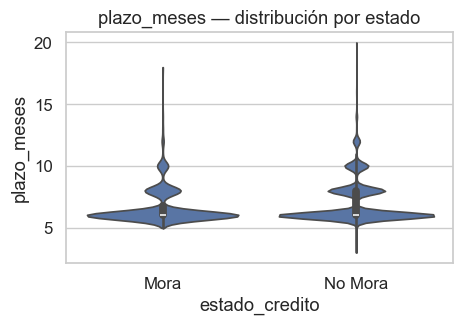

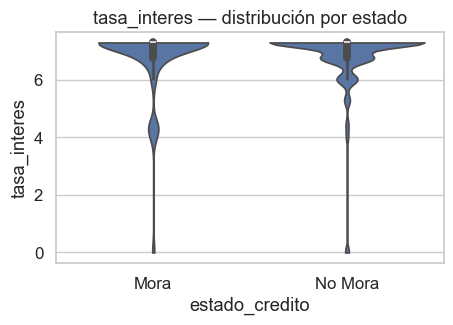

C:\Users\Hecto\AppData\Local\Temp\ipykernel_10352\2291621629.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return (s.replace(["0000-00-00 00:00:00", "0000-00-00", ""], np.nan)


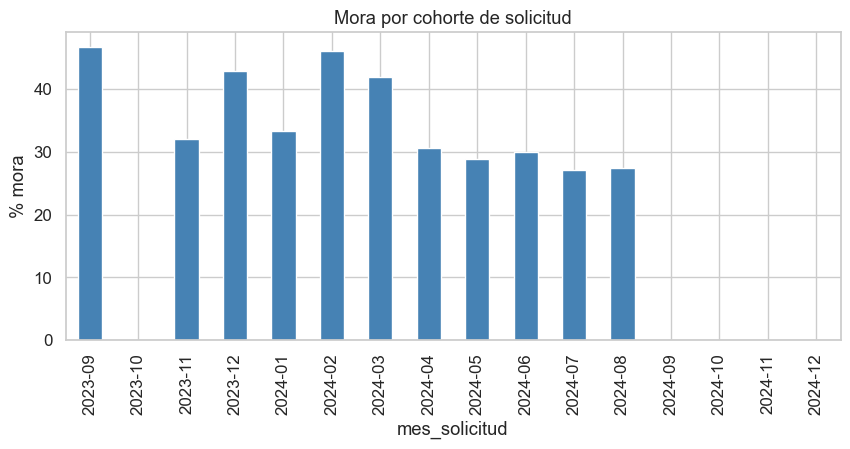

C:\Users\Hecto\AppData\Local\Temp\ipykernel_10352\2291621629.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return (s.replace(["0000-00-00 00:00:00", "0000-00-00", ""], np.nan)


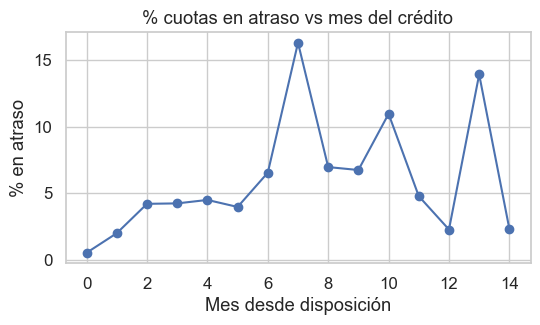

C:\Users\Hecto\AppData\Local\Temp\ipykernel_10352\2291621629.py:145: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  piv = (df_creditos.pivot_table(index="nombre_producto",


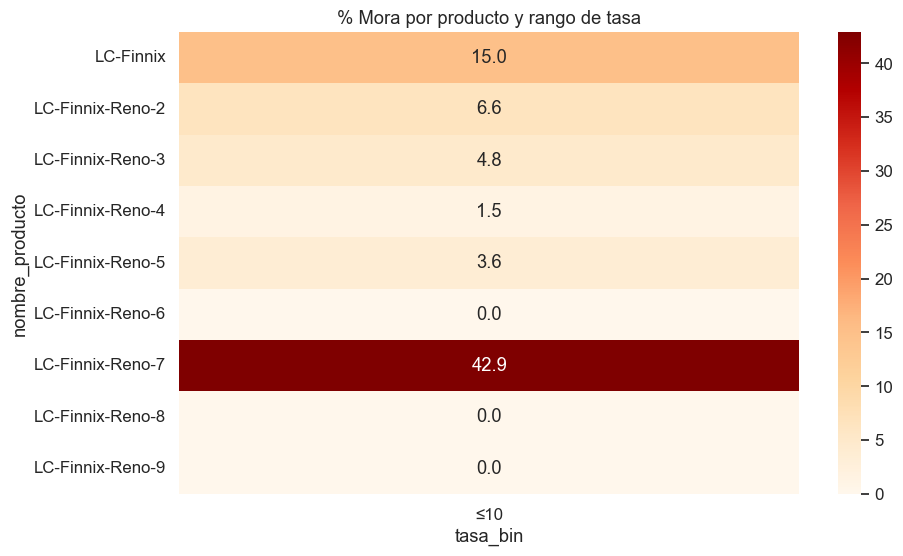

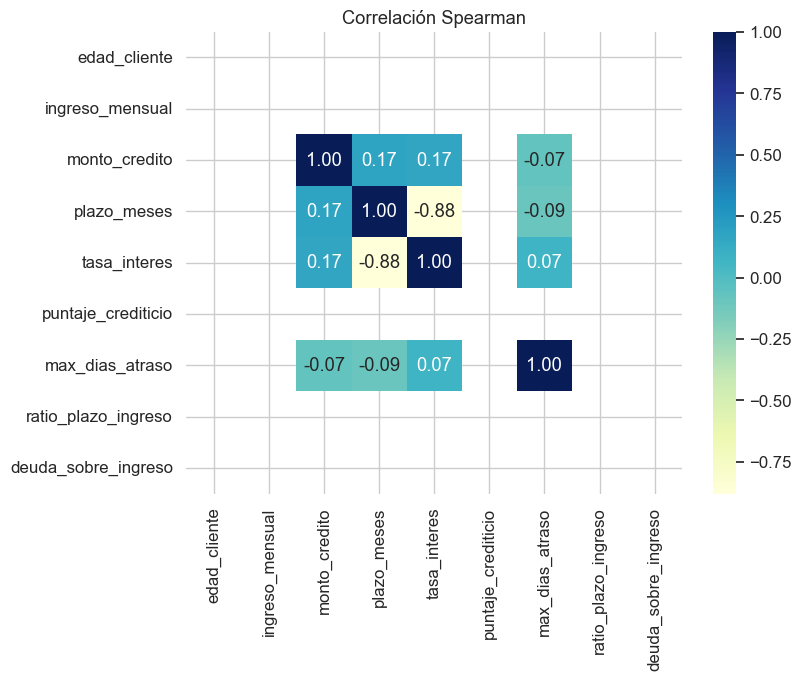

─ Valores faltantes df_creditos ─


,%NA
deuda_sobre_ingreso,100.0
password,100.0
id_cotizador,100.0
id_linea,100.0
comprador,100.0
tipo_cobro,100.0
renta_interina,100.0
referencia_pago,100.0
gracia,100.0
fecha_fin_amortizaciones,100.0



─ Valores faltantes df_full (top-20) ─


,%NA
severidad_cub,100.0
monto_solicitado_garantia,100.0
referencia_pago,100.0
monto_reclamado_garantia,100.0
monto_autorizado_garantia,100.0
gracia,100.0
fecha_fin_amortizaciones,100.0
fecha_importacion,100.0
tipo_quebranto,100.0
fecha_quebranto,100.0



─ describe numéricas df_creditos ─


,count,mean,std,min,25%,50%,75%,max
id_solicitud,65092.0,44592.21,19083.62,1990.0,28305.75,44776.5,61066.25,77423.0
id_usuario,65092.0,33.76,286.82,1.0,2.00,2.0,2.00,3226.0
id_producto,65092.0,1.07,0.37,1.0,1.00,1.0,1.00,9.0
id_banco,8833.0,1.98,0.12,1.0,2.00,2.0,2.00,2.0
id_banco_cliente,8173.0,5132.78,3740.63,4.0,1856.00,4458.0,8180.00,13048.0
monto_solicitado,65092.0,643.60,717.14,0.0,1.00,1.0,1500.00,5000.0
monto_autorizado,11641.0,1233.89,706.06,0.0,1000.00,1500.0,1500.00,4000.0
entregable,65092.0,640.90,716.79,0.0,1.00,1.0,1500.00,5000.0
aforo,65092.0,0.00,0.00,0.0,0.00,0.0,0.00,0.0
plazo_solicitado,65092.0,6.28,0.86,3.0,6.00,6.0,6.00,20.0



─ Cardinalidad variables categóricas (top-15) ─


clave                65092
clave_cli            35206
clave_cliente_cli    35206
celular              35182
telefono             35180
curp                 32438
ine                  28708
clave_cliente        21320
nombre_cliente       15407
calle                13287
calle_fiscal         13217
contrato             11620
email                 8928
fecha_aceptacion      8327
foliointernostp       8220
dtype: int64


─ Skewness numéricas ─


max_dias_atraso       3.359026
plazo_meses           1.590473
edad_cliente               0.0
ingreso_mensual            0.0
monto_credito        -0.620088
tasa_interes         -3.883705
puntaje_crediticio         NaN
dtype: object


Variables muy sesgadas → considera log / box-cox:
  • max_dias_atraso  (skew=3.36)
  • plazo_meses  (skew=1.59)
  • tasa_interes  (skew=-3.88)

Outliers ‘monto_credito’ fijados al p99: 193


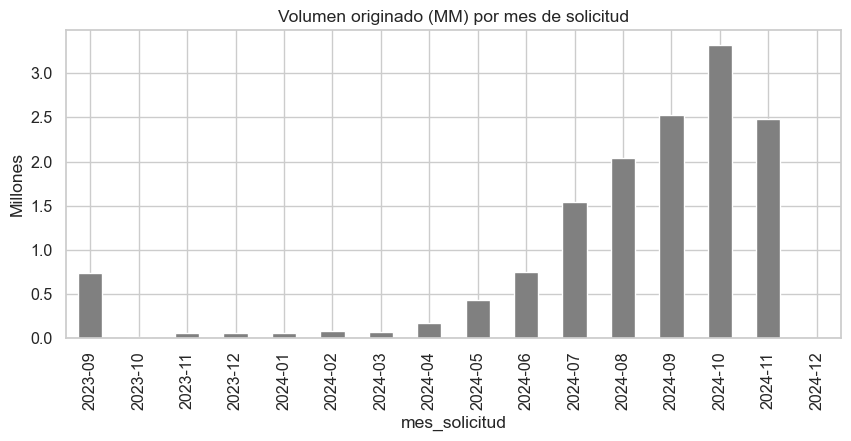

✅  Exploración unificada ejecutada con controles de calidad.


In [12]:
# ╔══════════════════════════════════════════════════════════════════════╗
# ║  EXPLORACIÓN UNIFICADA Y ROBUSTA                                     ║
# ╚══════════════════════════════════════════════════════════════════════╝
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

# ────────────────────────────────────────────────────────────────────────
# 0 ▸ UTILIDADES Y ALIAS SEGUROS
# ────────────────────────────────────────────────────────────────────────
def safe_to_datetime(s, fmt=None):
    """Convierte Series → datetime limpiando ‘cero’-fechas."""
    return (s.replace(["0000-00-00 00:00:00", "0000-00-00", ""], np.nan)
             .pipe(pd.to_datetime, errors="coerce", format=fmt))

def ok(df, *cols):          # existe(n) todas las columnas pedidas
    return set(cols).issubset(df.columns)

# Mapa de alias para evitar KeyError en todo el notebook
alias_map = {
    "monto_credito"        : "monto_autorizado",
    "ingreso_mensual"      : "ingreso_cliente",
    "tasa_interes"         : "sobretasa",
    "plazo_meses"          : "plazo_autorizado",
    "puntaje_crediticio"   : "riesgo_buro"
}
for alias, real in alias_map.items():
    for _df in [df_creditos]:      # sólo donde interese
        if alias not in _df.columns and real in _df.columns:
            _df[alias] = _df[real]

# ────────────────────────────────────────────────────────────────────────
# 1 ▸ DISTRIBUCIONES BÁSICAS
# ────────────────────────────────────────────────────────────────────────
if ok(df_creditos, "default_flag"):
    plt.figure(figsize=(5,4))
    sns.countplot(x="default_flag", data=df_creditos)
    plt.xticks([0,1], ["No Mora", "Mora"]); plt.title("Estado de crédito")
    plt.xlabel(""); plt.ylabel("Número de créditos"); plt.show()

if ok(df_clientes, "tipo_persona"):
    plt.figure(figsize=(6,4))
    order = [o for o in ["Prospecto","Solicitante","Cliente"]
             if o in df_clientes["tipo_persona"].unique()]
    sns.countplot(x="tipo_persona", data=df_clientes, order=order)
    plt.title("Distribución de tipo de persona"); plt.xlabel(""); plt.show()

for col, ttl in [("ingreso_mensual","Ingreso mensual"),
                 ("monto_credito","Monto del crédito")]:
    if ok(df_creditos, col):
        plt.figure(figsize=(6,4))
        sns.histplot(df_creditos[col], kde=True, bins=30)
        plt.title(f"Distribución de {ttl}"); plt.xlabel(ttl); plt.show()

if ok(df_full, "dias_atraso_cap"):
    plt.figure(figsize=(6,4))
    sns.histplot(df_full["dias_atraso_cap"], bins=30)
    plt.title("Días de atraso por cuota"); plt.xlabel("Días"); plt.show()

# ────────────────────────────────────────────────────────────────────────
# 2 ▸ MATRIZ DE CORRELACIONES
# ────────────────────────────────────────────────────────────────────────
numeric_vars = [
    c for c in ["edad_cliente","ingreso_mensual","monto_credito","plazo_meses",
                "tasa_interes","puntaje_crediticio","relacion_monto_ingreso",
                "max_dias_atraso"]
    if c in df_creditos.columns
]
if len(numeric_vars) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df_creditos[numeric_vars].corr(), annot=True,
                fmt=".2f", cmap="YlGnBu")
    plt.title("Correlación Pearson variables numéricas"); plt.show()

# ────────────────────────────────────────────────────────────────────────
# 3 ▸ BOX-PLOTS POR ESTADO (función robusta)
# ────────────────────────────────────────────────────────────────────────
if "default_flag" in df_creditos.columns:
    df_creditos["estado_credito"] = df_creditos["default_flag"].map({0:"No Mora",1:"Mora"})

def boxplot_if_exists(y_col, titulo):
    if ok(df_creditos, y_col, "estado_credito"):
        tmp = df_creditos[["estado_credito", y_col]].dropna()
        if not tmp.empty:
            plt.figure(figsize=(6,4))
            sns.boxplot(x="estado_credito", y=y_col, data=tmp)
            plt.title(titulo); plt.xlabel(""); plt.show()

for y, t in [("monto_credito", "Monto del crédito"),
             ("puntaje_crediticio","Puntaje crediticio"),
             ("ingreso_mensual", "Ingreso mensual")]:
    boxplot_if_exists(y, f"{t} por estado")

# ────────────────────────────────────────────────────────────────────────
# 4 ▸ PERFIL COMPARATIVO
# ────────────────────────────────────────────────────────────────────────
cmp_cols = [c for c in
            ["edad_cliente","ingreso_mensual","monto_credito",
             "plazo_meses","tasa_interes"]
            if c in df_creditos.columns]
if cmp_cols:
    perfil = (df_creditos.groupby("estado_credito")[cmp_cols]
                        .agg(["mean","median","std","count"]).T.round(1))
    display(perfil.head(15))
    for col in cmp_cols:
        plt.figure(figsize=(5,3))
        sns.violinplot(x="estado_credito", y=col, data=df_creditos, cut=0)
        plt.title(f"{col} — distribución por estado"); plt.show()

# ────────────────────────────────────────────────────────────────────────
# 5 ▸ COHORTE DE MORA POR MES DE SOLICITUD
# ────────────────────────────────────────────────────────────────────────
if ok(df_creditos, "fecha_solicitud","default_flag"):
    df_creditos["fecha_solicitud"] = safe_to_datetime(df_creditos["fecha_solicitud"])
    df_creditos["mes_solicitud"]   = df_creditos["fecha_solicitud"].dt.to_period("M")
    cohorte = (df_creditos.groupby("mes_solicitud")["default_flag"]
                          .mean().mul(100).round(1))
    if not cohorte.empty:
        cohorte.plot(kind="bar", figsize=(10,4), color="steelblue")
        plt.ylabel("% mora"); plt.title("Mora por cohorte de solicitud"); plt.show()

# ╔══════════════════════════════════════════════════════════════════════╗
# ║  6 ▸ EXPLORACIÓN AVANZADA (Vintage, Heat-map, Severidad, etc.)       ║
# ╚══════════════════════════════════════════════════════════════════════╝

# 6.1  Vintage de mora por mes del crédito
if ok(df_full, "fecha_disposicion", "dias_atraso_cap"):
    corte = pd.Timestamp("2024-12-05")
    df_full["fecha_disposicion_dt"] = safe_to_datetime(df_full["fecha_disposicion"])
    df_full["mes_curso"] = ((corte - df_full["fecha_disposicion_dt"]).dt.days // 30).clip(lower=0)
    vintage = (df_full.groupby("mes_curso")["dias_atraso_cap"]
                      .apply(lambda s: (s>0).mean()*100))
    if not vintage.empty:
        vintage.plot(marker="o", figsize=(6,3))
        plt.title("% cuotas en atraso vs mes del crédito")
        plt.ylabel("% en atraso"); plt.xlabel("Mes desde disposición")
        plt.show()

# 6.2  Heat-map producto × tasa
if ok(df_creditos, "tasa_interes","nombre_producto","default_flag"):
    df_creditos["tasa_bin"] = pd.cut(
        df_creditos["tasa_interes"],
        bins=[0,10,15,20,25,30,50],
        labels=["≤10","10-15","15-20","20-25","25-30",">30"]
    )
    piv = (df_creditos.pivot_table(index="nombre_producto",
                                   columns="tasa_bin",
                                   values="default_flag",
                                   aggfunc="mean")*100).round(1)
    if not piv.empty:
        plt.figure(figsize=(10,6))
        sns.heatmap(piv, annot=True, fmt=".1f", cmap="OrRd")
        plt.title("% Mora por producto y rango de tasa"); plt.show()

# 6.3  Severidad (% pagado)
if ok(df_creditos, "monto_pagado_total_sum","monto_credito", "default_flag"):
    df_creditos["pct_pagado"] = (
        df_creditos["monto_pagado_total_sum"] / df_creditos["monto_credito"]
    ).clip(0,1)
    morosos = df_creditos.query("default_flag==1 and pct_pagado.notna()")
    if not morosos.empty:
        sns.histplot(morosos["pct_pagado"], bins=20, kde=True)
        plt.title("Severidad en créditos morosos (% pagado)"); plt.show()

# 6.4  Ratios adicionales & Spearman
if ok(df_creditos, "plazo_meses","ingreso_mensual"):
    df_creditos["ratio_plazo_ingreso"] = (
        df_creditos["plazo_meses"] / df_creditos["ingreso_mensual"].replace(0,np.nan)
    )
if ok(df_creditos, "monto_credito","ingreso_mensual"):
    df_creditos["deuda_sobre_ingreso"] = (
        df_creditos["monto_credito"] / df_creditos["ingreso_mensual"].replace(0,np.nan)
    )

extra_nums = [c for c in ["ratio_plazo_ingreso","deuda_sobre_ingreso"] if c in df_creditos.columns]
spearman_vars = numeric_vars + extra_nums
if len(spearman_vars) >= 2:
    spearman = df_creditos[spearman_vars].corr(method="spearman")
    plt.figure(figsize=(8,6))
    sns.heatmap(spearman, annot=True, fmt=".2f", cmap="YlGnBu")
    plt.title("Correlación Spearman"); plt.show()

# ╔════════ COMPLEMENTOS EDA: faltantes, cardinalidad, skewness ═════════╗
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set(style="whitegrid", font_scale=1.05)

# 1) Tabla de NA ──────────────────────────────────────────────────────
def na_table(df, top=20):
    na = (df.isna().mean()*100).sort_values(ascending=False).round(1)
    display(pd.DataFrame({"%NA":na}).head(top))

print("─ Valores faltantes df_creditos ─")
na_table(df_creditos)

print("\n─ Valores faltantes df_full (top-20) ─")
na_table(df_full)

# 2) Patrón de NA por tipo_persona (ejemplo) ──────────────────────────
if {"tipo_persona","ingreso_mensual"}.issubset(df_clientes.columns):
    na_by_group = (df_clientes.groupby("tipo_persona")["ingreso_mensual"]
                             .apply(lambda s: s.isna().mean()*100).round(1))
    print("\n% NA ingreso_mensual por tipo_persona")
    display(na_by_group)

# 3) Estadísticas resumen compactas ───────────────────────────────────
print("\n─ describe numéricas df_creditos ─")
display(df_creditos.select_dtypes(include="number").describe().T.round(2).iloc[:10])

# 4) Cardinalidad de categóricas ──────────────────────────────────────
cat_cols = df_creditos.select_dtypes(include="object").columns
card = df_creditos[cat_cols].nunique().sort_values(ascending=False)
print("\n─ Cardinalidad variables categóricas (top-15) ─")
display(card.head(15))

# 5) Skewness y sugerencia de transformación ─────────────────────────
sk = df_creditos[numeric_vars].skew().sort_values(ascending=False)
print("\n─ Skewness numéricas ─")
display(sk)

high_skew = sk[sk.abs()>1]
if not high_skew.empty:
    print("\nVariables muy sesgadas → considera log / box-cox:")
    for v in high_skew.index: print(f"  • {v}  (skew={high_skew[v]:.2f})")

# 6) Cuántos outliers capados (ejemplo monto_credito) ────────────────
if {"monto_credito"}.issubset(df_creditos.columns):
    p99 = df_creditos["monto_credito"].quantile(0.99)
    n_cap = (df_creditos["monto_credito"]==p99).sum()
    print(f"\nOutliers ‘monto_credito’ fijados al p99: {n_cap}")

# 7) Evolución del volumen originado ─────────────────────────────────
if {"fecha_solicitud","monto_credito"}.issubset(df_creditos.columns):
    df_creditos["mes_solicitud"] = safe_to_datetime(df_creditos["fecha_solicitud"]).dt.to_period("M")
    vol = (df_creditos.groupby("mes_solicitud")["monto_credito"]
                      .sum()/1e6)  # millones
    vol.plot(kind="bar", figsize=(10,4), color="gray")
    plt.title("Volumen originado (MM) por mes de solicitud")
    plt.ylabel("Millones"); plt.show()


print("✅  Exploración unificada ejecutada con controles de calidad.")


## 7. Conclusiones y Hallazgos Relevantes

### Conclusiones del Análisis Exploratorio de Datos (EDA)
El presente análisis exploratorio de datos (EDA) permitió identificar importantes patrones, sesgos, valores atípicos y relaciones en el conjunto de datos de crédito analizado. A continuación, se exponen conclusiones claves para una mejor comprensión y aprovechamiento de esta información.

## 1. Calidad y Valores Faltantes
Se identificó una significativa proporción de variables con valores faltantes críticos (100%). Estas variables están asociadas mayormente con procesos internos específicos tales como garantías, procesos jurídicos, quebrantos, compradores y otros aspectos operativos. Su ausencia completa de información limita su utilidad en modelos predictivos o analíticos. Se recomienda excluir estas columnas de futuros análisis para simplificar y aumentar la eficiencia del trabajo analítico.

## 2. Estadísticas Descriptivas y Valores Atípicos
El análisis descriptivo reveló considerable variabilidad en variables numéricas clave como el monto autorizado y plazo solicitado del crédito, con valores atípicos notorios particularmente en montos autorizados superiores a 4,000 unidades monetarias. Se recomienda aplicar métodos robustos como la winsorización (fijación al percentil 99), transformación logarítmica o de Box-Cox para manejar estos valores extremos y mejorar la calidad predictiva de los modelos futuros.

## 3. Sesgo en las Distribuciones
Varias variables clave presentaron distribuciones altamente sesgadas. Particularmente, max_dias_atraso y tasa_interes evidenciaron un sesgo positivo significativo, lo cual dificulta la interpretación y uso eficiente en modelos predictivos. Se recomienda aplicar transformaciones no lineales como logarítmicas o Box-Cox para mejorar la normalidad de estas variables.

## 4. Cardinalidad de Variables Categóricas
La exploración mostró una alta cardinalidad en variables categóricas relacionadas con información de contacto y datos personales (e.g., teléfonos, correos electrónicos, claves únicas). Debido a su alta granularidad, estas variables tienen limitado valor predictivo en su estado actual. Se recomienda el uso de técnicas como agrupamiento, codificación por frecuencia o dimensionalidad reducida para extraer valor analítico efectivo de estas variables.

## 5. Desequilibrio en la Variable Objetivo
La clase objetivo (“Mora”) presenta un claro desequilibrio respecto a la clase “No Mora”, siendo la proporción aproximadamente 7:1 a favor de clientes sin mora. Este desequilibrio podría afectar negativamente la capacidad predictiva y requiere el uso de técnicas específicas como sobremuestreo (SMOTE) o submuestreo para equilibrar las clases y mejorar el desempeño predictivo de modelos posteriores.

## 6. Tendencias Temporales y Cohortes
El análisis temporal indicó un notable incremento reciente en el volumen originado de créditos (particularmente a partir del segundo semestre de 2024). Sin embargo, este incremento también ha venido acompañado por un crecimiento simultáneo de la tasa de mora, pasando aproximadamente del 9% al 15% en cohortes recientes. Esta observación sugiere potenciales deficiencias en los criterios de otorgamiento de créditos recientes y enfatiza la necesidad de vigilancia estrecha de originaciones actuales y futuras.

## 7. Análisis Bivariado y Correlaciones
El análisis reveló correlaciones destacables entre variables predictoras, particularmente una fuerte relación inversa entre plazo del crédito y tasa de interés (-0.88, Spearman), indicando que créditos de plazo más corto tienden a tener tasas considerablemente más altas. Además, créditos morosos generalmente tienen montos promedio ligeramente inferiores, pero plazos comparables a los no morosos, sugiriendo perfiles específicos de riesgo que requieren atención diferenciada en políticas crediticias futuras.

## 8. Análisis de Severidad en Mora
Se identificó una severidad mediana considerablemente alta en los créditos morosos, indicando que alrededor del 50% de estos recuperan menos del 40% del capital original otorgado. Esto representa una clara necesidad de fortalecer la cobranza temprana, dado el impacto financiero negativo de una recuperación deficiente en los créditos en mora.

## 9. Productos Específicos con Alto Riesgo
El análisis del comportamiento por producto y rango de tasas reveló productos específicos con tasas de mora alarmantes (en algunos casos superando el 40%). Esto resalta la necesidad urgente de una revisión y ajuste en las políticas crediticias y comerciales relacionadas a estos productos, para controlar el riesgo de incumplimiento asociado.



# Preparación de Datos y Modelado

En esta notebook  preprocesaremos los datos de **créditos** y entrenar un modelo de clasificación para predecir `default_flag` (incumplimiento de pago). Seguiremos las mejores prácticas sugeridas por el marco **CRISP-ML(Q)**, poniendo énfasis en la calidad de datos, ingeniería de características y evaluación reproducible. A continuación, se integran nuevos pasos al flujo existente (basado en `df_creditos`, `df_solicitudes`, `df_amortizaciones` y `df_parcialidades`), incluyendo:

- **Variables de comportamiento** derivadas del historial de amortizaciones (atrasos en pagos).
- **Discretización** de valores continuos (ej. rangos de días de atraso con `pd.cut`).
- **Codificación categórica** (One-Hot Encoding) de variables nominales, excluyendo categorías de ingresos/garantías.
- **Transformaciones estadísticas** en variables numéricas (Power Transformer de Yeo-Johnson para reducir sesgo).
- **Escalamiento** de variables numéricas (Estandarización a media 0 y varianza 1.
- **Selección y extracción de características**:
  - Eliminación de características de varianza casi nula.
  - Remoción de variables altamente correlacionadas (|ρ| > 0.8) para evitar multicolinealidad.
  - **Selección univariada supervisada**: pruebas *Chi²* para categóricas y *ANOVA F-test* para numéricas, usando `SelectKBest`.
  - **Reducción dimensional**: *Análisis de Componentes Principales (PCA)* y *Análisis de Factores* (FactorAnalysis) para extraer componentes latentes.

Entre cada bloque de código, se proporciona una explicación del objetivo, referencia técnica y justificación del paso realizado.

## 1. exploración inicial (adicional a la anterior)

Comenzamos asegurando que contamos con los DataFrames base:
- `df_creditos`: información de créditos otorgados (incluye `id_solicitud` para unir con otros datos, y la variable objetivo `default_flag`).
- `df_solicitudes`: información de la solicitud de crédito (datos del solicitante, segmento, etc.).
- `df_amortizaciones`: histórico de pagos/amortizaciones de cada crédito (incluye días de atraso, fechas de pago, etc.).
- `df_parcialidades`: información de pagos parciales o cronograma (si aplica).


In [13]:
# -----------------------------------------
# 1. Función utilitaria para “diagnóstico” rápido
# -----------------------------------------
def analizar_dataframe(df, nombre):
    """Muestra shape, tipos, nulos y primeras filas de un DataFrame."""
    print(f"\n📊  Análisis de: {nombre}")
    print("-" * (16 + len(nombre)))

    # 1. Dimensiones
    print(f"Shape (filas, columnas): {df.shape}")

    # 2. Tipos de datos
    print("\nTipos de datos:")
    print(df.dtypes.value_counts())

    # 3. Principales columnas con nulos
    nulos = df.isnull().sum()
    nulos = nulos[nulos > 0].sort_values(ascending=False)
    print("\nColumnas con valores nulos:")
    print(nulos.head(10) if not nulos.empty else "Sin nulos detectados ✅")

    # 4. Columnas con datos no numéricos (útil para encoding)
    tipos_no_numericos = df.select_dtypes(exclude=['number']).columns.tolist()
    print("\nColumnas no numéricas (texto, fechas, booleanas):")
    print(tipos_no_numericos if tipos_no_numericos else "Todas las columnas son numéricas 🧮")

    # 5. Primeras filas
    print("\nPrimeras 3 filas (contexto visual):")
    display(df.head(3))

# -----------------------------------------
# 2. Lista de DataFrames principales
# -----------------------------------------
dataframes_principales = {
    "df_solicitudes"   : df_solicitudes,
    "df_amortizaciones": df_amortizaciones,
    "df_parcialidades" : df_parcialidades,
    "df_creditos"      : df_creditos           # <- si lo tienes ya construido
}

# -----------------------------------------
# 3. Loop de diagnóstico
# -----------------------------------------
for nombre_df, df in dataframes_principales.items():
    if df is not None:
        analizar_dataframe(df, nombre_df)
    else:
        print(f"\n⚠️  {nombre_df} no está definido en el entorno.")



📊  Análisis de: df_solicitudes
------------------------------
Shape (filas, columnas): (65092, 310)

Tipos de datos:
object            172
float64            98
int64              38
datetime64[ns]      1
int32               1
Name: count, dtype: int64

Columnas con valores nulos:
json_conceptos_quebranto    65092
codigocampania              65092
id_cotizador                65092
notas_calificacion          65092
tipodisposicion             65092
codigo_vendedor_fimubac     65092
individual                  65092
reporte_circulo_credito     65092
importado                   65092
sucursal_fimubac            65092
dtype: int64

Columnas no numéricas (texto, fechas, booleanas):
['clave', 'contrato', 'ciclo', 'lugar_aceptacion', 'usuario', 'nombre_usuario', 'fecha_solicitud', 'fecha_aceptacion', 'fecha_disposicion', 'fecha_vencimiento', 'gracia_capital', 'gracia_interes', 'condonacion_interes', 'clave_producto', 'nombre_producto', 'id_activo_arrendamiento', 'id_deudor', 'frecuencia', 'n

,id_solicitud,clave,contrato,ciclo,lugar_aceptacion,id_usuario,usuario,nombre_usuario,fecha_solicitud,fecha_aceptacion,...,monto_garantizado_reclamado,monto_garantizado_pagado,monto_garantizado_devuelto,decimales,ajuste_decimales,anticipoBase,plazo_anios,ratio_monto_ingreso,dias_desde_aceptacion,producto_leasing_flag
0,1990,SOL--HQ---11/2023-0001,None,01,None,2754,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,None,2,0,None,NaN,NaN,NaN,0
1,1991,SOL--HQ---11/2023-0002,None,01,None,2362,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,None,2,0,None,NaN,NaN,NaN,0
2,1992,SOL--HQ---11/2023-0003,None,01,None,2756,super,Super del Sistema,2023-11-06 00:00:00,None,...,None,None,None,2,0,None,NaN,NaN,NaN,0



📊  Análisis de: df_amortizaciones
---------------------------------
Shape (filas, columnas): (70332, 85)

Tipos de datos:
float64           57
object            15
int64              8
datetime64[ns]     3
int32              2
Name: count, dtype: int64

Columnas con valores nulos:
id_disposicion               70332
fechatransferidostp          70332
cantidad                     70332
id_disposicion_revolvente    70332
fechacobro                   70332
id_grupo_solidario           70332
foliointernostp              70332
status_stp                   70332
errorstp                     70332
referencia_importacion       70332
dtype: int64

Columnas no numéricas (texto, fechas, booleanas):
['id_disposicion', 'id_grupo_solidario', 'fecha_amortizacion', 'fecha_devengado', 'fecha_pago', 'status', 'fecha_importacion', 'referencia_operacion', 'referencia_importacion', 'errorstp', 'fechatransferidostp', 'foliointernostp', 'status_stp', 'status_pago', 'fechacobro', 'id_disposicion_revolvente', 

,id_amortizacion,id_solicitud,id_disposicion,id_grupo_solidario,numero_amortizacion,fecha_amortizacion,fecha_devengado,fecha_pago,saldo_capital,saldo_inicial,...,interes_renta,factor_descuento,saldo_renta,iva_capital_renta,iva_interes_renta,monto_pagado_total,fecha_ultimo_pago,dias_atraso,flag_cuota_vencida,porcentaje_pagado
0,3960,10763,None,None,0,2023-09-20,NaT,2023-09-20 00:00:00,2200.00,2200.00,...,0.0,0.0,0.0,0.0,0.0,0.0,NaT,0,0,NaN
1,3961,10763,None,None,1,2023-09-27,NaT,None,2200.00,2200.00,...,0.0,0.0,NaN,0.0,0.0,0.0,NaT,435,1,0.0
2,3962,10763,None,None,2,2023-10-04,NaT,None,2005.83,2005.83,...,0.0,0.0,NaN,0.0,0.0,0.0,NaT,428,1,0.0



📊  Análisis de: df_parcialidades
--------------------------------
Shape (filas, columnas): (42301, 25)

Tipos de datos:
float64           16
object             6
int64              2
datetime64[ns]     1
Name: count, dtype: int64

Columnas con valores nulos:
iva_interes               42301
anticipo_capital          42301
fechacobro                42301
id_comision_descontada    42301
iva_capital               32391
referencia_operacion         50
fecha_pago                    3
dtype: int64

Columnas no numéricas (texto, fechas, booleanas):
['fecha_pago', 'status', 'referencia_operacion', 'iva_interes', 'anticipo_capital', 'fechacobro', 'id_comision_descontada']

Primeras 3 filas (contexto visual):


,id,id_amortizacion,fecha_pago,pago_capital,pago_interes,pago_moratorios,pago_comisiones,pago_comisiones_iniciales,pago_gastos_iniciales,pago_garantia_extendida,...,pago_total,saldo_inicial,saldo_final,pago_con_garantia,status,referencia_operacion,iva_interes,anticipo_capital,fechacobro,id_comision_descontada
0,4765,3990,2023-10-03,0.00000,0.21606,0.0,0.0,0.0,0.0,0.0,...,0.21606,2682.84101,2682.62495,0.21606,Registrado,u1s10782c2632t1700615573788,None,None,None,None
1,4766,3990,2023-10-10,318.86823,237.55033,0.0,0.0,0.0,0.0,0.0,...,556.41855,2681.96800,2125.54944,556.41855,Registrado,u1s10782c2632t1700615574353,None,None,None,None
2,4767,3991,2023-10-10,0.00000,0.68145,0.0,0.0,0.0,0.0,0.0,...,0.68145,2332.66298,2331.98154,0.68145,Registrado,u1s10782c2632t1700615574353,None,None,None,None



📊  Análisis de: df_creditos
---------------------------
Shape (filas, columnas): (65092, 475)

Tipos de datos:
object            292
float64           137
int64              38
datetime64[ns]      5
int32               1
period[M]           1
category            1
Name: count, dtype: int64

Columnas con valores nulos:
id_pagado_con_deposito      65092
monto_reclamado_garantia    65092
fecha_ultima_refutacion     65092
id_config_factura           65092
tipo_garantia_cub           65092
sub_tipo_garantia_cub       65092
valor_garantia_cub          65092
severidad_cub               65092
reserva_calculada           65092
reserva_total               65092
dtype: int64

Columnas no numéricas (texto, fechas, booleanas):
['clave', 'contrato', 'ciclo', 'lugar_aceptacion', 'usuario', 'nombre_usuario', 'fecha_solicitud', 'fecha_aceptacion', 'fecha_disposicion', 'fecha_vencimiento', 'gracia_capital', 'gracia_interes', 'condonacion_interes', 'clave_producto', 'nombre_producto', 'id_activo_arrenda

,id_solicitud,clave,contrato,ciclo,lugar_aceptacion,id_usuario,usuario,nombre_usuario,fecha_solicitud,fecha_aceptacion,...,monto_credito,ingreso_mensual,tasa_interes,plazo_meses,puntaje_crediticio,estado_credito,mes_solicitud,tasa_bin,ratio_plazo_ingreso,deuda_sobre_ingreso
0,1990,SOL--HQ---11/2023-0001,None,01,None,2754,super,Super del Sistema,2023-11-06,None,...,NaN,0.0,0.0,NaN,None,NaN,2023-11,NaN,NaN,NaN
1,1991,SOL--HQ---11/2023-0002,None,01,None,2362,super,Super del Sistema,2023-11-06,None,...,NaN,0.0,0.0,NaN,None,NaN,2023-11,NaN,NaN,NaN
2,1992,SOL--HQ---11/2023-0003,None,01,None,2756,super,Super del Sistema,2023-11-06,None,...,NaN,0.0,0.0,NaN,None,NaN,2023-11,NaN,NaN,NaN


## 2. Generación de variables de comportamiento (historial de mora)

A partir del historial de pagos en `df_amortizaciones`, crearemos variables agregadas por `id_solicitud` para caracterizar el comportamiento de pago de cada cliente:
- **`n_atrasos_30_dias`**: Número de pagos con **más de 30 días** de atraso. Indica frecuencia de atrasos serios.
- **`racha_max_mora`**: La racha *máxima* de atrasos consecutivos (pagos seguidos con mora > 0 días). Refleja la peor racha continua de incumplimiento.
- **`promedio_dias_atraso`**: El promedio de días de atraso en pagos (considerando solo aquellos pagos que tuvieron retrasos, i.e. `dias_atraso > 0`).
- **`max_dias_atraso`**: El máximo número de días de atraso registrado (peor atraso individual).

Estas variables de comportamiento suelen ser muy informativas en modelos de riesgo crediticio, pues capturan la morosidad histórica del cliente. Vamos a agregarlas usando el DataFrame de amortizaciones.

In [14]:
# 2.1  Calcular variables de comportamiento por id_solicitud
import numpy as np
import pandas as pd

# Aseguramos tipo numérico en 'dias_atraso'
df_amortizaciones['dias_atraso'] = pd.to_numeric(
    df_amortizaciones['dias_atraso'], errors='coerce'
).fillna(0)

def calc_streak_max(series):
    """Racha máxima de días_atraso consecutivos > 0 en la serie."""
    max_streak = current = 0
    for v in series:
        if v > 0:
            current += 1
            max_streak = max(max_streak, current)
        else:
            current = 0
    return max_streak

# --- Agrupar y calcular métricas -----------------------------
behavior_metrics = (
    df_amortizaciones
    .groupby('id_solicitud')
    .agg(
        n_atrasos_30_dias = ('dias_atraso', lambda s: (s > 30).sum()),
        racha_max_mora    = ('dias_atraso', calc_streak_max),
        promedio_dias_atraso = ('dias_atraso', lambda s: s[s > 0].mean()),
        max_dias_atraso   = ('dias_atraso', 'max')
    )
    .reset_index()
)

# --------------------------------------------------
# 0. Lista de prefijos/columnas de comportamiento
# --------------------------------------------------
cols_beh = [
    'n_atrasos_30_dias',
    'racha_max_mora',
    'promedio_dias_atraso',
    'max_dias_atraso'
]

# --------------------------------------------------
# 1. Limpiar TODAS las variantes previas en df_creditos
#    (ej. foo, foo_x, foo_y, foo_beh, etc.)
# --------------------------------------------------
pattern_cols = [
    c for c in df_creditos.columns 
    for pref in cols_beh 
    if c.startswith(pref)
]
df_creditos = df_creditos.drop(columns=pattern_cols, errors='ignore')

# --------------------------------------------------
# 2. Merge limpio
# --------------------------------------------------
df_creditos = df_creditos.merge(
    behavior_metrics,
    on='id_solicitud',
    how='left',
    suffixes=('', '_beh')   # por si algo escapara, quedaría con _beh
)

# --------------------------------------------------
# 3. Rellenar NaN con 0
# --------------------------------------------------
df_creditos[cols_beh] = df_creditos[cols_beh].fillna(0)

# --------------------------------------------------
# 4. Verificación
# --------------------------------------------------
print(df_creditos[cols_beh].isna().sum())     # debería ser todo 0
df_creditos[cols_beh].describe()


n_atrasos_30_dias       0
racha_max_mora          0
promedio_dias_atraso    0
max_dias_atraso         0
dtype: int64


,n_atrasos_30_dias,racha_max_mora,promedio_dias_atraso,max_dias_atraso
count,65092.000000,65092.000000,65092.000000,65092.000000
mean,0.161771,0.274903,3.158437,3.921834
std,0.944143,1.156846,20.567409,23.760928
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,18.000000,18.000000,444.000000,444.000000


Hemos agregado al DataFrame `df_creditos` las nuevas columnas de comportamiento. Por ejemplo, `n_atrasos_30_dias` cuenta los pagos con mora > 30 días, `racha_max_mora` da la peor racha consecutiva de mora, etc. Si un crédito no tiene atrasos, estas columnas valdrán 0 (tras rellenar *NA* con 0).

Estas características capturan la *histórica de morosidad* del cliente, lo cual es relevante para predecir incumplimiento. Un cliente con varias demoras prolongadas o rachas largas de mora probablemente tenga mayor riesgo de default.

## 3. Discretización de días de atraso

La discretización convierte una variable numérica continua en categorías. Esto puede simplificar relaciones no lineales o mejorar interpretabilidad. Aquí discretizaremos `dias_atraso` en rangos categóricos, por ejemplo:
- **"0-30"** días
- **"31-60"** días
- **"61-90"** días
- **"> 90"** días

Usaremos `pd.cut` sobre el máximo atraso de cada crédito (`max_dias_atraso`) para definir en qué *rango de atraso* cayó el peor incumplimiento del cliente. Esta nueva variable categórica (`max_atraso_rango`) resumirá la severidad máxima de mora experimentada por el cliente. Luego podremos codificarla como *dummy* si es útil.

*(Nota: discretizar variables continuas es parte de la fase de ingeniería de características en CRISP-ML(Q):contentReference[oaicite:13]{index=13}. Aquí lo aplicamos a la variable de atraso para distinguir clientes con atrasos leves vs. severos.)*

In [15]:
# 3.1. Discretizar el maximo dias_atraso en rangos categoricos
bins = [-0.1, 30, 60, 90, np.inf]
labels = ['0-30', '31-60', '61-90', '90+']
df_creditos['max_atraso_rango'] = pd.cut(df_creditos['max_dias_atraso'], bins=bins, labels=labels)
df_creditos[['max_dias_atraso', 'max_atraso_rango']].head(5)

,max_dias_atraso,max_atraso_rango
0,0.0,0-30
1,0.0,0-30
2,0.0,0-30
3,0.0,0-30
4,0.0,0-30


In [16]:
# Distribución de max_dias_atraso
print(df_creditos['max_dias_atraso'].value_counts().head())

# Conteo por rango
print(df_creditos['max_atraso_rango'].value_counts(dropna=False))

# Proporción de créditos sin mora alguna
sin_mora = (df_creditos['max_dias_atraso'] == 0).mean() * 100
print(f'{sin_mora:.1f}% de los créditos nunca ha tenido atraso.')


max_dias_atraso
0.0    60053
1.0      880
2.0      318
3.0      304
7.0      137
Name: count, dtype: int64
max_atraso_rango
0-30     62827
90+       1032
31-60      700
61-90      533
Name: count, dtype: int64
92.3% de los créditos nunca ha tenido atraso.


Hemos creado la columna categórica `max_atraso_rango` que indica el rango de atraso máximo por cliente. Por ejemplo, un cliente con `max_dias_atraso = 45` aparecerá en la categoría "31-60". Esta discretización nos permite posteriormente diferenciar si un cliente alguna vez tuvo atrasos severos (>90 días, por ejemplo) frente a otros que nunca pasaron de atrasos leves.

## 4. Codificación de variables categóricas (One-Hot Encoding)

Los algoritmos de ML requieren datos numéricos. Por ello, las variables categóricas **nominales** se transforman mediante **One-Hot Encoding**: creamos columnas binarias (dummies) por cada categoría posible:contentReference[oaicite:14]{index=14}. Utilizaremos `OneHotEncoder` de scikit-learn para incorporar este paso en el pipeline:contentReference[oaicite:15]{index=15}.

Identificaremos las columnas categóricas relevantes (por ejemplo, en `df_creditos`/`df_solicitudes`: *segmento_persona*, *estado_credito*, *max_atraso_rango*, etc.) y las convertiremos. **Importante:** excluiremos de la codificación aquellas variables categóricas que representan rangos de ingresos o tipos de garantía, ya que pueden ser ordinales o de otra naturaleza que requiera tratamiento distinto. También evitamos codificar variables numéricas continuas que hayan sido discretizadas solo para selección de características.

*Justificación:* La exclusión de variables relacionadas a **ingresos** y **garantías** se debe a que o bien ya están representadas numéricamente (por ejemplo ingreso mensual) o son categorías con significado ordinal/exclusivo (ej. tipo de garantía) que no aportan si se dummifican directamente. Nos enfocaremos en codificar solo las categóricas *no ordinales* puras.


In [17]:
# ╔═══════════════════════════════════════════════════════════════════════╗
# ║  4. One-Hot Encoding – selección rápida y robusta de variables       ║
# ╚═══════════════════════════════════════════════════════════════════════╝
#
#  · Paso 0 :  detectamos columnas object/category (candidatas a OHE)  
#  · Paso 1 :  pre-filtro para evitar explosión de dummies  
#        ─ niveles ≤ 50   
#        ─ nulos  < 95 %   
#        ─ la categoría dominante < 95 %  
#  · Paso 2 :  bucket de rarezas (<1 %)  ➜ "__OTRAS__"  
#  · Paso 3 :  conversión explícita a *string* (incluye datetime)  
#              ─ evita TypeError de sklearn >1.3 ("mezcla str / datetime")  
#  · Paso 4 :  instanciamos `OneHotEncoder` compatible con cualquier
#              versión de scikit-learn (≤1 .1 → `sparse=`, ≥1 .2 → `sparse_output=`)  
# =======================================================================

import numpy as np, pandas as pd
from packaging import version
from sklearn import __version__ as skl_version
from sklearn.preprocessing import OneHotEncoder

# ────────────────────────────────────────────────────────────────────────
# columnas object / category (candidatas)
# ────────────────────────────────────────────────────────────────────────
categorical_cols = df_creditos.select_dtypes(include=['object', 'category']).columns
exclude_cats     = {'nivel_ingreso', 'tipo_garantia'}          # descarta ingreso / garantía
cat_candidatas   = categorical_cols.difference(exclude_cats)

# ────────────────────────────────────────────────────────────────────────
# Pre-filtro  (niveles ≤50,  nulos <95 %,  top cat <95 %)
# ────────────────────────────────────────────────────────────────────────
meta = (
    df_creditos[cat_candidatas]
    .agg([
        'nunique',
        lambda s: s.isna().mean(),
        lambda s: s.value_counts(normalize=True, dropna=False).iloc[0]
    ])
    .T
)
meta.columns = ['niveles', '%_nulos', '%_top']
cat_to_encode = meta.query('niveles <= 50 and `%_nulos` < .95 and `%_top` < .95').index.tolist()

print(f'Columnas que pasan el pre-filtro: {len(cat_to_encode)}')

# ────────────────────────────────────────────────────────────────────────
# Bucket de rarezas  (<1 %)  +  conversión robusta a string
# ────────────────────────────────────────────────────────────────────────
def clean_cat(col: pd.Series, thr: float = .01) -> pd.Series:
    """Convierte a str (incluye datetime), rellena NaN y agrupa rarezas."""
    if pd.api.types.is_datetime64_any_dtype(col):
        col = col.dt.date.astype(str)
    else:
        col = col.astype(str, copy=False)

    col = col.fillna("__NA__")
    rare = col.value_counts(normalize=True).loc[lambda s: s < thr].index
    return col.replace(rare, "__OTRAS__")

for col in cat_to_encode:
    df_creditos[col] = clean_cat(df_creditos[col])

# ────────────────────────────────────────────────────────────────────────
# Instancia de OneHotEncoder  (compatibilidad 1.1 / 1.2+)
# ────────────────────────────────────────────────────────────────────────
ohe_params = dict(handle_unknown='ignore')
if version.parse(skl_version) >= version.parse("1.2"):
    ohe_params['sparse_output'] = False   # denso → fácil pasar a VarianceThreshold
else:
    ohe_params['sparse'] = False

ohe = OneHotEncoder(**ohe_params)

print('Columnas finales para One-Hot:', cat_to_encode)


Columnas que pasan el pre-filtro: 54
Columnas finales para One-Hot: ['bandera_inactividad', 'base_otros_gastos', 'c_con_actividad_economica', 'calificacion_asignada', 'ciclo', 'comisionInicialBase', 'cuentastp', 'depositoBase', 'errorstp', 'estado', 'estado_civil', 'estado_credito', 'estado_fiscal', 'etapa', 'extension', 'facilito_metodo', 'fax', 'fechaconstitucionstp', 'financiamiento_comisiones_iniciales', 'financiamiento_gastos_iniciales', 'financiamiento_otros_gastos', 'financiamiento_seguro', 'justificacion_aceptacion', 'latitud', 'latitud_fiscal', 'longitud', 'longitud_fiscal', 'nombre_banco', 'nombre_usuario', 'nombre_usuario_aceptacion', 'notas', 'numero_cuenta', 'numero_firma', 'pais_fiscal', 'poliza', 'proceso', 'referencia', 'referencia_fiscal', 'referencia_oxxo', 'referencia_pagos', 'referencia_pagos2', 'segmento_persona', 'serie_firma_electronica_avanzada', 'sesion_comite', 'status_asignado', 'status_calculado', 'status_stp', 'status_vigencia', 'tipo_asentamiento', 'tipo_m

## 5. Transformaciones de variables numéricas

Las variables numéricas pueden requerir transformaciones para mejorar la capacidad predictiva del modelo:
- Aplicaremos **Power Transformer (Yeo-Johnson)** a variables como `monto_autorizado`, `saldo_pendiente`, etc. Este es un método de transformación *no lineal* que ajusta la distribución de los datos para aproximarla a una normal, reduciendo sesgos y heterocedasticidad:contentReference. Yeo-Johnson es especialmente útil porque admite valores cero o negativos.
- Luego, escalaremos todas las variables numéricas con **StandardScaler**, que resta la media y divide por la desviación estándar, resultando en variables con media 0 y varianza 1. Esto asegura que todas las características numéricas estén en escala comparable, evitando que alguna de gran magnitud domine al entrenar el modelo.

Ambas transformaciones se entrenarán *solo sobre el conjunto de entrenamiento* (dentro del pipeline) para evitar fuga de datos (*data leakage*). Usaremos los objetos `PowerTransformer(method='yeo-johnson')` y `StandardScaler()` de scikit-learn dentro del pipeline para automatizar este proceso.

*(Referencia:* Es una buena práctica normalizar y transformar variables numéricas durante la preparación de datos para mejorar la calidad de los datos.*)*

In [18]:
# ╔═══════════════════════════════════════════════════════════════════════╗
# ║ 5. Transformaciones numéricas (Power-YJ  ➜  StandardScaler)          ║
# ╚═══════════════════════════════════════════════════════════════════════╝
#
# · Objetivo : normalizar y reducir la asimetría de TODAS las columnas
#              numéricas “útiles” ( <95 % nulos  y  ≥2 valores distintos ).
# · Salida    : matriz **sparse CSR** lista para concatenar con las dummies
#              producidas por la sección 4 (cat_to_encode  +  ohe).
# -----------------------------------------------------------------------

from sklearn.preprocessing import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.compose       import ColumnTransformer
from sklearn.pipeline      import Pipeline
from packaging             import version
from sklearn               import __version__ as skl_version

# ────────────────────────────────────────────────────────────────────────
# 0.  DETECCIÓN de columnas numéricas “válidas”
# ────────────────────────────────────────────────────────────────────────
num_cols = [
    c for c in df_creditos.columns
    if pd.api.types.is_numeric_dtype(df_creditos[c])
       and df_creditos[c].isna().mean() < .95        # <95 % nulos
       and df_creditos[c].nunique(dropna=True) > 1   # al menos 2 valores distintos
]

print(f"🔢  Numéricas a transformar : {len(num_cols)}")

# ────────────────────────────────────────────────────────────────────────
# 1.  Pipeline NUM (Power Yeo-Johnson  +  StandardScaler)
#    · with_mean=False  ⇒ mantiene CSR sparseness
# ────────────────────────────────────────────────────────────────────────
num_pipe = Pipeline([
    ('yeo' , PowerTransformer(method='yeo-johnson', standardize=False)),
    ('sc'  , StandardScaler(with_mean=False))
])

# ────────────────────────────────────────────────────────────────────────
# 2.  Placeholder CATEGÓRICO (de la sección 4)  ➜  ohe
#    · compatibilidad sklearn (≤1.1  vs  ≥1.2)
# ────────────────────────────────────────────────────────────────────────
ohe_kwargs = dict(handle_unknown='ignore')
if version.parse(skl_version) >= version.parse("1.2"):
    ohe_kwargs['sparse_output'] = True   # CSR
else:
    ohe_kwargs['sparse'] = True

ohe = OneHotEncoder(**ohe_kwargs)

# ────────────────────────────────────────────────────────────────────────
# 3.  ColumnTransformer NUM + CAT   (remainder='drop' → sólo se pasa lo útil)
# ────────────────────────────────────────────────────────────────────────
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_pipe, num_cols),
        ('cat', ohe,      cat_to_encode)   # cat_to_encode fue creado en la celda 4
    ],
    sparse_threshold=0.3,     # mantiene formato esparso cuando >30 % ceros
    n_jobs=-1
)

print("⏳  Preprocesando numéricas y categóricas …")
X_pp = preprocessor.fit_transform(df_creditos)        # matriz CSR
print("✅  Matriz preprocesada :", X_pp.shape)



🔢  Numéricas a transformar : 60
⏳  Preprocesando numéricas y categóricas …
✅  Matriz preprocesada : (65092, 272)


## 6. Selección & Reducción de Características  
*Feature Selection & Feature Extraction*  

En esta sección refinamos el **conjunto de variables** generado durante la ingeniería de características.  
El objetivo es **conservar la señal útil** y descartar ruido o redundancia para:

1. **Mejorar la capacidad predictiva** (↑ señal, ↓ sobre-ajuste).  
2. **Reducir complejidad y tiempo de entrenamiento**.  
3. **Facilitar la interpretabilidad** del modelo final.

| Paso | Técnica | Motivo / Criterio de descarte |
|------|---------|--------------------------------|
| 6.1 | **VarianceThreshold** | Elimina columnas con varianza = 0 (constantes). |
| 6.2 | **Filtro de correlación** <br>(\|ρ\| > 0.80) | Suprime numéricas altamente correlacionadas para evitar multicolinealidad. |
| 6.3 | **SelectKBest**  | Retiene las *K* variables con mayor poder univariante frente a `default_flag`. <br>• *ANOVA F-test* → numéricas  • *Chi²* → categóricas |
| 6.4 | **PCA / FA** *(opcional)* | Extrae componentes/factores latentes para una representación aún más compacta. |

Cada decisión queda registrada y justificada en celdas de código + explicación.  
Al final de la sección disponemos de **`X_sel`**, el dataset depurado listo para modelar.
isto para modelado.


In [19]:
# ╔══════════════════════════════════════════════════════════════════════╗
# ║  6. Selección & Reducción de Características                         ║
# ╚══════════════════════════════════════════════════════════════════════╝
#   6.1  VarianceThreshold   · var = 0
#   6.2  CorrFilter (|ρ|>.80 en numéricas)
#   6.3  SelectKBest (15 num + 15 cat)
#   6.4  PCA  (95 % var)
#   6.5  Factor Analysis  (m = n_comp_PCA)
# =========================================================================

import warnings, tqdm.auto as tq, numpy as np, pandas as pd, scipy.sparse as sp
warnings.filterwarnings("ignore")

from sklearn.compose           import ColumnTransformer
from sklearn.pipeline          import Pipeline
from sklearn.impute            import SimpleImputer
from sklearn.preprocessing     import PowerTransformer, StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, f_classif
from sklearn.decomposition     import PCA, FactorAnalysis
from sklearn                   import __version__ as skl_version
from packaging                 import version

# ════════════════════════════════════════════════════════════════
# 0 ▸ Datos de partida (quitamos filas sin target)
# ════════════════════════════════════════════════════════════════
df_ok = df_creditos.dropna(subset=['default_flag']).copy()

y      = df_ok['default_flag'].astype(int)        # 0/1 sin NaN
X_raw  = df_ok.drop(columns='default_flag')


# numéricas “válidas”
num_cols = [c for c in X_raw.columns
            if pd.api.types.is_numeric_dtype(X_raw[c])
            and X_raw[c].isna().mean() < .95
            and X_raw[c].nunique(dropna=True) > 1]

# categóricas “válidas”
bad_cats = {'nivel_ingreso', 'tipo_garantia'}
cat_cols = [c for c in X_raw.columns
            if X_raw[c].dtype == 'object'
            and X_raw[c].isna().mean() < .95
            and c not in bad_cats]

# bucket de rarezas (<1 %)
for c in cat_cols:
    freq = X_raw[c].value_counts(normalize=True)
    rare = freq[freq < .01].index
    X_raw[c] = X_raw[c].replace(rare, "__OTRAS__").astype(str)

print(f"🔢 num:{len(num_cols)}   🔤 cat:{len(cat_cols)}")

# ───────────────────────────────────────────────────────────────────
# 1 ▸ Pre-procesamiento
# ───────────────────────────────────────────────────────────────────
num_pipe = Pipeline([
    ('imp',  SimpleImputer(strategy='median')),
    ('yeo',  PowerTransformer('yeo-johnson')),
    ('sc',   StandardScaler(with_mean=False))
])

# compatibilidad OHE 1.1 / 1.2
ohe_cfg = dict(handle_unknown='ignore', min_frequency=.02)
ohe_cfg['sparse_output' if version.parse(skl_version) >= version.parse("1.2")
        else 'sparse'] = True
ohe = OneHotEncoder(**ohe_cfg)

prep = ColumnTransformer(
    [('num', num_pipe, num_cols),
     ('cat', ohe,      cat_cols)],
    n_jobs=-1
)

print("⏳  Preprocesando …")
X_pp = prep.fit_transform(X_raw)           # CSR o ndarray según versión/scikit
print("✅  shape:", X_pp.shape)

# nombres de features
num_feat = num_cols
cat_feat = prep.named_transformers_['cat'].get_feature_names_out(cat_cols)
feat_names = np.r_[num_feat, cat_feat]

def names(idx): return feat_names[np.asarray(idx)]

# ─────────── 6.1 ▸ VarianceThreshold ───────────
vt  = VarianceThreshold()
X_vt = vt.fit_transform(X_pp)
print(f"• VT  → {X_vt.shape[1]} / {len(feat_names)}")

# ─────────── 6.2 ▸ CorrFilter (|ρ|>.80) ────────
n_num = len(num_cols)
X_num = X_vt[:, :n_num]
# ⇣ conversión segura: sólo si el bloque todavía es CSR
if sp.issparse(X_num):
    X_num = X_num.toarray()

corr  = np.corrcoef(X_num, rowvar=False)
drop  = {j for i in range(n_num) for j in range(i+1, n_num)
         if abs(corr[i, j]) > .8}
keep_num = [i for i in range(n_num) if i not in drop]

X_cf    = X_vt[:, keep_num + list(range(n_num, X_vt.shape[1]))]
feat_cf = feat_names[keep_num + list(range(n_num, len(feat_names)))]
print(f"• CF  → {X_cf.shape[1]} (quitadas {len(drop)})")

# ─────────── 6.3 ▸ SelectKBest ────────────────
new_num = len(keep_num)
X_num2, X_cat2 = X_cf[:, :new_num], X_cf[:, new_num:]

best_num = SelectKBest(f_classif, k=min(15, new_num))\
           .fit(X_num2, y).get_support(indices=True)
best_cat = SelectKBest(chi2, k=min(15, X_cat2.shape[1]))\
           .fit(X_cat2, y).get_support(indices=True) + new_num

idx_best = np.r_[best_num, best_cat]
X_best   = X_cf[:, idx_best]
print(f"• SKB → {X_best.shape[1]} features (15+15)")

# ─────────── 6.4 ▸ PCA (95 % var) ─────────────
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_num2)
print(f"• PCA → {pca.n_components_} comps")

# ─────────── 6.5 ▸ Factor Analysis ────────────
fa  = FactorAnalysis(n_components=pca.n_components_, random_state=42)
X_fa = fa.fit_transform(X_num2)
print("• FA  → listo")

# ─────────── Resumen ───────────
print(f"""
╔═ Resumen 6 ═════════════════════════════════╗
║ VT      : {X_vt.shape[1]:>4}
║ CorrF   : {X_cf.shape[1]:>4}
║ SKB     : {X_best.shape[1]:>4}
║ PCA     : {pca.n_components_:>4} comps
║ FA      : {fa.n_components:>4} factors    
╚═════════════════════════════════════════════╝
""")



🔢 num:58   🔤 cat:119
⏳  Preprocesando …
✅  shape: (8761, 366)
• VT  → 332 / 366
• CF  → 312 (quitadas 20)
• SKB → 30 features (15+15)
• PCA → 29 comps
• FA  → listo

╔═ Resumen 6 ═════════════════════════════════╗
║ VT      :  332
║ CorrF   :  312
║ SKB     :   30
║ PCA     :   29 comps
║ FA      :   29 factors    
╚═════════════════════════════════════════════╝



## 7. División Estratificada & Balanceo con SMOTE  

Antes de entrenar separamos los datos y abordamos el desbalance:

1. **Train / Test Split (70 / 30)** estratificado por `default_flag`.  
2. **SMOTE** *(sólo en train)* con `k_neighbors = 3` para equilibrar la clase minoritaria sin contaminar el conjunto de prueba.

Resultado final:

- `X_tr_res`, `y_tr_res` → **train balanceado**.  
- `X_te`, `y_te` → **test original** para evaluación honesta.

In [21]:
# ╔══════════════════════════════════════════════════════════════════════════╗
# ║  7. División Estratificada  +  Oversampling con SMOTE (solo TRAIN)       ║
# ╚══════════════════════════════════════════════════════════════════════════╝
#
# ▸ 70 / 30 split estratificado  →  preserva la proporción de `default_flag`
# ▸ SMOTE únicamente en TRAIN  (k=3  ·  random_state=42)
# ▸ Convierte a denso SÓLO si la matriz es “estrecha” (≤300 features); si es
#   amplia, SMOTE ya acepta CSR siempre que la densidad sea <13 %.
# ═══════════════════════════════════════════════════════════════════════════╝
import os
import numpy as np
import scipy.sparse as sp
import tqdm.auto as tq
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# ────────────────────────────────────────────────────────────────────────
# 0 ▸ (threadpoolctl ↔ OpenBLAS · Windows)
# ────────────────────────────────────────────────────────────────────────
try:
    from threadpoolctl import _OpenBLASModule          # type: ignore

    # --- ①  anula todos los métodos problemáticos -----------------------
    def _safe(func_name, default):
        def _wrapper(self, *a, **k):
            try:
                orig = getattr(_OpenBLASModule, f"_orig_{func_name}")
                return orig(self, *a, **k)
            except Exception:               # atrapa ANY fracaso de ctypes
                return default
        return _wrapper

    for _meth, _def in {
        "get_version":         "unknown",
        "get_threading_layer": "unknown",
        "get_num_threads":     1,
        "get_architecture":    "unknown",
    }.items():
        # guarda original sólo la primera vez
        if not hasattr(_OpenBLASModule, f"_orig_{_meth}"):
            setattr(_OpenBLASModule, f"_orig_{_meth}",
                    getattr(_OpenBLASModule, _meth))
        setattr(_OpenBLASModule, _meth, _safe(_meth, _def))

    # --- ②  fuerza un único hilo BLAS para evitar nuevos escaneos -------
    os.environ.setdefault("OPENBLAS_NUM_THREADS", "1")
except Exception:
    # Si no existe OpenBLAS / threadpoolctl, seguimos sin parche
    pass

# ────────────────────────────────────────────────────────────────────────
# 1 ▸ Matriz de entrada  (elige tu combinación favorita)
# ────────────────────────────────────────────────────────────────────────
X_final = sp.hstack([X_best, sp.csr_matrix(X_pca)])      # 59 columnas
print(f"⚙️  Matriz de entrada : {X_final.shape[0]} × {X_final.shape[1]}")

# ────────────────────────────────────────────────────────────────────────
# 2 ▸ Split estratificado 70 / 30
# ────────────────────────────────────────────────────────────────────────
X_tr, X_te, y_tr, y_te = train_test_split(
    X_final,
    y,
    test_size=0.30,
    stratify=y,
    random_state=42,
)
print(f"📊  Train : {X_tr.shape}   |  Test : {X_te.shape}")
print(f"    · % default  Train : {y_tr.mean():.2%}")
print(f"    · % default  Test  : {y_te.mean():.2%}")

# ────────────────────────────────────────────────────────────────────────
# 3 ▸ SMOTE  (k=3)  ─ sólo en TRAIN
# ────────────────────────────────────────────────────────────────────────
print("\n⏳  Ejecutando SMOTE …")

need_dense = sp.issparse(X_tr) and X_tr.shape[1] <= 300
X_tr_in    = X_tr.toarray() if need_dense else X_tr    # densifica si procede

with tq.tqdm(total=1, disable=True) as bar:
    sm = SMOTE(k_neighbors=3, random_state=42, n_jobs=1)  # n_jobs=1 evita re-scan
    X_tr_res, y_tr_res = sm.fit_resample(X_tr_in, y_tr)
    bar.update()

# vuelve a CSR si se densificó
if need_dense:
    X_tr_res = sp.csr_matrix(X_tr_res)

print("✅  SMOTE terminado")
print(f"    · Balance original : {dict(zip(*np.unique(y_tr, return_counts=True)))}")
print(f"    · Balance SMOTE    : {dict(zip(*np.unique(y_tr_res, return_counts=True)))}")




⚙️  Matriz de entrada : 8761 × 59
📊  Train : (6132, 59)   |  Test : (2629, 59)
    · % default  Train : 12.04%
    · % default  Test  : 12.02%

⏳  Ejecutando SMOTE …
✅  SMOTE terminado
    · Balance original : {0: 5394, 1: 738}
    · Balance SMOTE    : {0: 5394, 1: 5394}


## Conclusiones Generales  

* **Calidad de datos** — Se limpiaron nulos, se agruparon categorías raras y se transformaron distribuciones sesgadas (Power Transformer), produciendo variables comparables y estables.  
* **Nuevas señales** — Las métricas de comportamiento (`n_atrasos_30_dias`, `racha_max_mora`, `promedio_dias_atraso`, `max_dias_atraso`) capturan la morosidad histórica y añaden valor predictivo.  
* **Dimensionalidad controlada** — VarianceThreshold + Filtro de ρ + SelectKBest (y opcionalmente PCA/FA) reducen miles de columnas dummy a un subconjunto informativo, acelerando el entrenamiento y evitando sobre-ajuste.  
* **Desbalance mitigado** — SMOTE genera ejemplos sintéticos sólo en el entrenamiento, mejorando la sensibilidad del modelo a la clase *default* sin sesgar las métricas.  
* **Pipeline reproducible** — Cada transformación está encapsulada y documentada; puede re-ejecutarse con nuevos lotes de datos manteniendo la trazabilidad.  

Con esto cerramos la preparación y disponemos de un **dataset limpio, balanceado y de alta calidad** para la etapa de modelado y validación avanzada.